In [1]:
# Importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',500)

### Reading the data 

In [2]:
# Reading the Application data set
app_data=pd.read_csv('application_data.csv')

In [3]:
# Checking the data set
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Reading the Previous application dataset 
prev_data=pd.read_csv('previous_application.csv')

In [5]:
# Checking the data set
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Checking the structure of the datasets

In [6]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# Getting the summary of numerical columns for Application dataset
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
# Checking the shape of Application dataset
app_data.shape

(307511, 122)

### Missing value analysis

In [9]:
# Let's check missing value % in the Dataset
round(100*app_data.isna().sum()/app_data.shape[0],2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [10]:
# Removing all the columns with more than 40% missing values
for i in app_data.columns:
    if (100*app_data[i].isna().sum()/app_data.shape[0])>40:
        app_data.drop(i,axis=1,inplace =True)

In [11]:
# Checking the dataset 
app_data.shape

(307511, 73)

In [12]:
# Other Missing values having < 14% missing values
miss_col=[]
for i in app_data.columns:
    if 0.01<(100*app_data[i].isna().sum()/app_data.shape[0])<14:
        miss_col.append(i)
print(miss_col)

['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


##### We won't impute any values for columns with more than 14% missing values as it can change the properties of the columns.

In [13]:
# General code for missing value info
def numerical_only(i):
    sns.boxplot(app_data[i])
    plt.show()
    print(app_data[i].describe(percentiles=[0.90,0.95,0.99]))
    print('{} % values are missing in this column'.format((100*app_data[i].isna().sum()/app_data.shape[0])))
    print('mean is {}'.format(app_data[i].mean()))
    print('median is {}'.format(app_data[i].median()))
def categorical_only(i):
    print(app_data[i].value_counts().head())
    print('Highest occuring category is "{}"'.format(app_data[i].mode()[0]))
    print('{}% values are missing in this column'.format((100*app_data[i].isna().sum()/app_data.shape[0])))

    
    

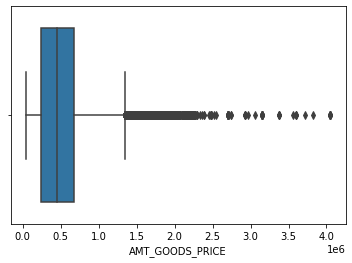

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
50%      4.500000e+05
90%      1.093500e+06
95%      1.305000e+06
99%      1.800000e+06
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
0.09040327012692229 % values are missing in this column
mean is 538396.2074288895
median is 450000.0


In [14]:
# Missing value analysis of 'AMT_GOODS_PRICE' column
numerical_only('AMT_GOODS_PRICE')

##### As There are Outliers in the data we can replace missing values with 450000.0 (Median) for 'AMT_GOODS_PRICE' column

In [15]:
# Missing value analysis of 'NAME_TYPE_SUITE' column
categorical_only('NAME_TYPE_SUITE')

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Name: NAME_TYPE_SUITE, dtype: int64
Highest occuring category is "Unaccompanied"
0.42014757195677555% values are missing in this column


##### We can replace all the missing values with "Unaccompanied" (Mode) for 'NAME_TYPE_SUITE' column

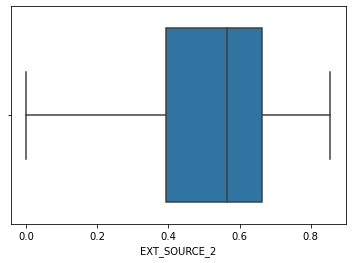

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
50%      5.659614e-01
90%      7.220467e-01
95%      7.477341e-01
99%      7.827928e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64
0.21462646864665003 % values are missing in this column
mean is 0.5143926741308463
median is 0.5659614260608526


In [16]:
# Missing value analysis of EXT_SOURCE_2 column
numerical_only('EXT_SOURCE_2')

##### As there are no outliers in the EXT_SOURCE_2 column so we can replace the missing values with 0.514 (Mean).

In [17]:
# Missing value analysis of 'OBS_30_CNT_SOCIAL_CIRCLE' column
categorical_only('OBS_30_CNT_SOCIAL_CIRCLE')

0.0    163910
1.0     48783
2.0     29808
3.0     20322
4.0     14143
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64
Highest occuring category is "0.0"
0.3320206431639844% values are missing in this column


##### We can replace all the misiing values with 0 (Mode) for 'OBS_30_CNT_SOCIAL_CIRCLE' column

In [18]:
# Missing value analysis of 'DEF_30_CNT_SOCIAL_CIRCLE column
categorical_only('DEF_30_CNT_SOCIAL_CIRCLE')

0.0    271324
1.0     28328
2.0      5323
3.0      1192
4.0       253
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64
Highest occuring category is "0.0"
0.3320206431639844% values are missing in this column


##### We can replace all the missing value with 0 (Mode) for 'DEF_30_CNT_SOCIAL_CIRCLE' column

In [19]:
# Missing value analysis of 'OBS_60_CNT_SOCIAL_CIRCLE' column
categorical_only('OBS_60_CNT_SOCIAL_CIRCLE')

0.0    164666
1.0     48870
2.0     29766
3.0     20215
4.0     13946
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64
Highest occuring category is "0.0"
0.3320206431639844% values are missing in this column


##### We can replace all the missing value with 0 (Mode) for 'OBS_60_CNT_SOCIAL_CIRCLE'  column

In [20]:
# Missing value analysis of 'DEF_60_CNT_SOCIAL_CIRCLE' column
categorical_only('DEF_60_CNT_SOCIAL_CIRCLE')

0.0    280721
1.0     21841
2.0      3170
3.0       598
4.0       135
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64
Highest occuring category is "0.0"
0.3320206431639844% values are missing in this column


##### We can replace all the missing value with 0 (Mode) for 'DEF_60_CNT_SOCIAL_CIRCLE'  column

In [21]:
# Missing value analysis of 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR' column
other=['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for i in other:
    categorical_only(i)
    print()
    print()
    

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
Highest occuring category is "0.0"
13.501630835970095% values are missing in this column


0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
Highest occuring category is "0.0"
13.501630835970095% values are missing in this column


0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
Highest occuring category is "0.0"
13.501630835970095% values are missing in this column


0.0    222233
1.0     33147
2.0      5386
3.0      1991
4.0      1076
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
Highest occuring category is "0.0"
13.501630835970095% values are missing in this column


0.0    215417
1.0     33862
2.0     14412
3.0      1717
4.0       476
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64
Highest occuring category is "0.0"
13.501630835970095%

##### So we can Replace missing value in 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR' columns with 0 (Mode).

### Data type analysis 

In [22]:
# Let's Analyse the data type of each column:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [23]:
# Modifying columns before changing there data type
# Adding all the enquiries to make a single column of total no of enquiries and dropping all other enquiry columns
col=['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
app_data['TOTAL_ENQ_YR']=0
for i in col:
    app_data['TOTAL_ENQ_YR']+=app_data[i]
    app_data.drop(i,axis=1,inplace=True)


In [24]:
# Transforming 'FLAG_OWN_CAR' and 'FLAG_OWN_REALTY' to one column
app_data['FLAG_OWN_CAR']=app_data['FLAG_OWN_CAR'].apply(lambda x: 0 if x=='N' else 1)
app_data['FLAG_OWN_REALTY']=app_data['FLAG_OWN_REALTY'].apply(lambda x: 0 if x=='N' else 2)

In [25]:
app_data['REALTY_CAR']=app_data['FLAG_OWN_CAR']+app_data['FLAG_OWN_REALTY']

In [26]:
def car_realty(i):
    if i==0:
        return 'No Car and Realty'
    if i==1:
        return 'Only Car'
    if i==2:
        return 'Only Realty'
    if i==3:
        return 'Both Car and Realty'
app_data['REALTY_CAR']=app_data['REALTY_CAR'].apply(lambda x: car_realty(x))
        

In [27]:
app_data.drop(['FLAG_OWN_CAR','FLAG_OWN_REALTY'],axis=1,inplace=True)

In [28]:
# Adding all the document column to give total no of document submitted and removing all other document flag columns
col=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
app_data['TOT_DOC_SUB']=0
for i in col:
    app_data['TOT_DOC_SUB']+=app_data[i]
    app_data.drop(i,axis=1,inplace=True)

In [29]:
# Adding all the phone flag columns and making a column of total contact points provided and dropping all contact flag columns
col=['FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL']
app_data['TOTAL_CONT_POINT']=0
for i in col:
    app_data['TOTAL_CONT_POINT']+=app_data[i]
    app_data.drop(i,axis=1,inplace=True)

In [30]:
app_data['TOTAL_CONT_POINT'].value_counts()

3    160972
4     70671
2     38357
5     35492
6      1992
1        27
Name: TOTAL_CONT_POINT, dtype: int64

In [31]:
# checking if the code worked fine
app_data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,TOTAL_ENQ_YR,REALTY_CAR,TOT_DOC_SUB,TOTAL_CONT_POINT
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1.0,Only Realty,1,4
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,No Car and Realty,1,4


##### Columns with less than 50 unique values should be changed to catgorical column 

In [32]:
# Lets change all the columns with <50 unique values to categorical columns

for i in app_data.columns:
    if app_data[i].nunique()<50:
        app_data[i]=app_data[i].astype('category')
app_data.info()       


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   CNT_CHILDREN                 307511 non-null  category
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307499 non-null  float64 
 8   AMT_GOODS_PRICE              307233 non-null  float64 
 9   NAME_TYPE_SUITE              306219 non-null  category
 10  NAME_INCOME_TYPE             307511 non-null  category
 11  NAME_EDUCATION_TYPE          307511 non-null  category
 12  NAME_FAMILY_STATUS           307511 non-null

In [33]:
# Lets change DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE columns to positive and convert them into yrs instead of days
app_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]=round(app_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].abs()/365,0)

In [34]:
# Changing the name of the columns from days to years
app_data.rename({'DAYS_BIRTH':'AGE','DAYS_EMPLOYED':'YRS_EMPLOYED','DAYS_REGISTRATION':'YRS_REGISTRATION','DAYS_ID_PUBLISH':'YRS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE':'YRS_LAST_PHONE_CHANGE'},axis=1,inplace=True)

In [35]:
app_data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YRS_EMPLOYED,YRS_REGISTRATION,YRS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YRS_LAST_PHONE_CHANGE,TOTAL_ENQ_YR,REALTY_CAR,TOT_DOC_SUB,TOTAL_CONT_POINT
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,2.0,10.0,6.0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.0,1.0,Only Realty,1,4
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,3.0,3.0,1.0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.0,0.0,No Car and Realty,1,4


### Outlier handling 

In [36]:
# Getting all the numerical columns except the id column
app_data.iloc[:,1:].describe().columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'AGE', 'YRS_EMPLOYED', 'YRS_REGISTRATION',
       'YRS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YRS_LAST_PHONE_CHANGE'],
      dtype='object')

In [37]:
# General code for Outlier info:
def outlier_info(i):
    sns.boxplot(app_data[i])
    print(app_data[i].describe(percentiles=[0.75,0.90,0.95,0.96,0.97,0.98,0.99]))
    tf=app_data[i].quantile(0.25)
    sf=app_data[i].quantile(0.75)
    iqr=sf-tf
    out=(tf-(1.5*iqr),sf+(1.5*iqr))
    conf_out=(tf-(3*iqr),sf+(3*iqr))
    print('All the values out of the range {} is a suspicious outlier.'.format(out))
    print('All the values out of the range {} is a confirmed outlier.'.format(conf_out))

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
50%      1.471500e+05
75%      2.025000e+05
90%      2.700000e+05
95%      3.375000e+05
96%      3.600000e+05
97%      3.825000e+05
98%      4.275000e+05
99%      4.725000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
All the values out of the range (-22500.0, 337500.0) is a suspicious outlier.
All the values out of the range (-157500.0, 472500.0) is a confirmed outlier.


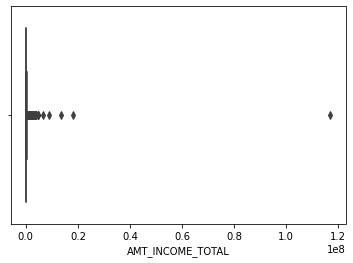

In [38]:
# Analysing Outlier in 'AMT_INCOME_TOTAL' column
outlier_info('AMT_INCOME_TOTAL')

##### As There are confirmed outliers in the  'AMT_INCOME_TOTAL' column we can remove all the values higher than 95 percentile to handle the outliers

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
50%      5.135310e+05
75%      8.086500e+05
90%      1.133748e+06
95%      1.350000e+06
96%      1.436850e+06
97%      1.546020e+06
98%      1.661418e+06
99%      1.854000e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
All the values out of the range (-537975.0, 1616625.0) is a suspicious outlier.
All the values out of the range (-1345950.0, 2424600.0) is a confirmed outlier.


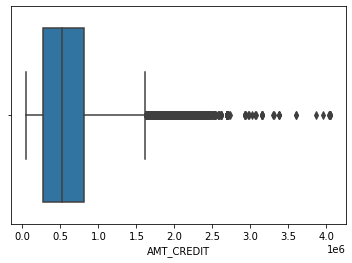

In [39]:
# Analysing Outlier in 'AMT_CREDIT' column
outlier_info('AMT_CREDIT')

##### As There are confirmed outliers in the 'AMT_CREDIT' column we can remove all the values higher than 97 percentile to handle the outliers.

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
50%       24903.000000
75%       34596.000000
90%       45954.000000
95%       53325.000000
96%       55624.500000
97%       58482.000000
98%       62964.000000
99%       70006.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
All the values out of the range (-10584.0, 61704.0) is a suspicious outlier.
All the values out of the range (-37692.0, 88812.0) is a confirmed outlier.


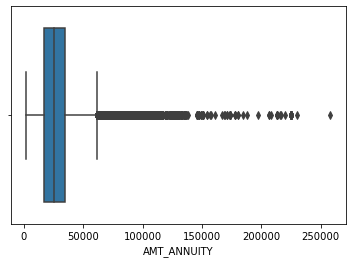

In [40]:
# Analysing Outlier in 'AMT_ANNUITY' column
outlier_info('AMT_ANNUITY')

#####  As There are confirmed outliers in the 'AMT_ANNUITY' column we can remove all the values higher than 97 percentile to handle the outliers

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
50%      4.500000e+05
75%      6.795000e+05
90%      1.093500e+06
95%      1.305000e+06
96%      1.350000e+06
97%      1.354500e+06
98%      1.575000e+06
99%      1.800000e+06
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
All the values out of the range (-423000.0, 1341000.0) is a suspicious outlier.
All the values out of the range (-1084500.0, 2002500.0) is a confirmed outlier.


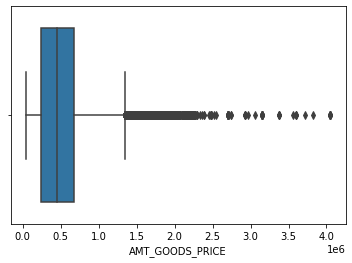

In [41]:
# Analysing Outlier in AMT_GOODS_PRICE column
outlier_info('AMT_GOODS_PRICE')

##### As There are confirmed outliers in the 'AMT_GOODS_PRICE' column we can remove all the values higher than 95 percentile to handle the outliers as till 95 percentile the values are under the range.

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
50%           0.018850
75%           0.028663
90%           0.035792
95%           0.046220
96%           0.046220
97%           0.046220
98%           0.072508
99%           0.072508
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64
All the values out of the range (-0.017979500000000002, 0.056648500000000004) is a suspicious outlier.
All the values out of the range (-0.045965, 0.084634) is a confirmed outlier.


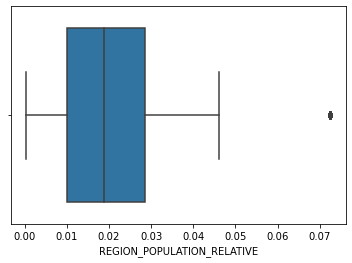

In [42]:

# Analysing Outlier in 'REGION_POPULATION_RELATIVE' column
outlier_info('REGION_POPULATION_RELATIVE')

#####  This kind of value must be possible so no need to handle outlier in this column

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
50%          43.000000
75%          54.000000
90%          61.000000
95%          64.000000
96%          64.000000
97%          65.000000
98%          66.000000
99%          67.000000
max          69.000000
Name: AGE, dtype: float64
All the values out of the range (4.0, 84.0) is a suspicious outlier.
All the values out of the range (-26.0, 114.0) is a confirmed outlier.


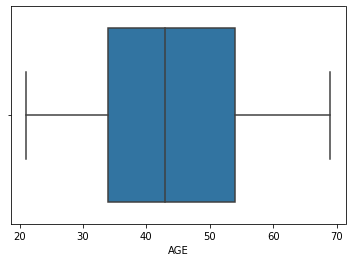

In [43]:

# Analysing Outlier in 'AGE' column
outlier_info('AGE')

##### There are no outliers in this column as all the values are in the range so we don't ahve to handle outlier for this column

count    307511.000000
mean        185.608021
std         382.165887
min           0.000000
50%           6.000000
75%          16.000000
90%        1001.000000
95%        1001.000000
96%        1001.000000
97%        1001.000000
98%        1001.000000
99%        1001.000000
max        1001.000000
Name: YRS_EMPLOYED, dtype: float64
All the values out of the range (-16.5, 35.5) is a suspicious outlier.
All the values out of the range (-36.0, 55.0) is a confirmed outlier.


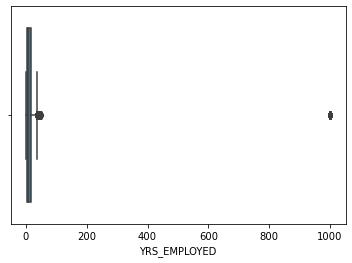

In [44]:

# Analysing Outlier in 'YRS_EMPLOYED' column
outlier_info('YRS_EMPLOYED')


##### We have to remove all the 1001 from  the  'YRS_EMPLOYED' column or replace it with NaN as this might be the indication that this value is unknown for these individuals , This way we can handle the outliers. 

count    307511.000000
mean         13.659440
std           9.659369
min           0.000000
50%          12.000000
75%          20.000000
90%          27.000000
95%          31.000000
96%          33.000000
97%          34.000000
98%          36.000000
99%          38.000000
max          68.000000
Name: YRS_REGISTRATION, dtype: float64
All the values out of the range (-15.0, 41.0) is a suspicious outlier.
All the values out of the range (-36.0, 62.0) is a confirmed outlier.


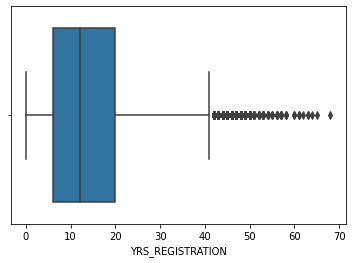

In [45]:
# Analysing Outlier in 'YRS_REGISTRATION' column
outlier_info('YRS_REGISTRATION')

##### There are values higher than the range here but this values looks continuous and can be possible so we will conclude that there are no outliers in 'YRS_REGISTRATION' column 

count    307511.000000
mean          8.198575
std           4.151520
min           0.000000
50%           9.000000
75%          12.000000
90%          13.000000
95%          14.000000
96%          14.000000
97%          14.000000
98%          14.000000
99%          15.000000
max          20.000000
Name: YRS_ID_PUBLISH, dtype: float64
All the values out of the range (-5.5, 22.5) is a suspicious outlier.
All the values out of the range (-16.0, 33.0) is a confirmed outlier.


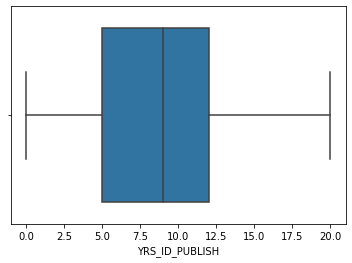

In [46]:
# Analysing Outlier in 'YRS_ID_PUBLISH' column
outlier_info('YRS_ID_PUBLISH')

##### No outlier in 'YRS_ID_PUBLISH' column.

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
50%      5.659614e-01
75%      6.636171e-01
90%      7.220467e-01
95%      7.477341e-01
96%      7.541508e-01
97%      7.615404e-01
98%      7.704858e-01
99%      7.827928e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64
All the values out of the range (-0.014282094178385663, 1.0703566001060345) is a suspicious outlier.
All the values out of the range (-0.4210216045350432, 1.477096110462692) is a confirmed outlier.


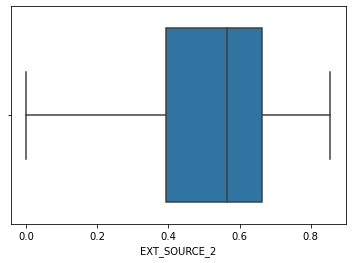

In [47]:
# Analysing Outlier in 'EXT_SOURCE_2' column
outlier_info('EXT_SOURCE_2')

#####  No outlier in 'EXT_SOURCE_2 column.

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
50%           0.535276
75%           0.669057
90%           0.749022
95%           0.786267
96%           0.798137
97%           0.809508
98%           0.819318
99%           0.832785
max           0.896010
Name: EXT_SOURCE_3, dtype: float64
All the values out of the range (-0.07696096134865194, 1.1166672884610378) is a suspicious outlier.
All the values out of the range (-0.5245715550272856, 1.5642778821396714) is a confirmed outlier.


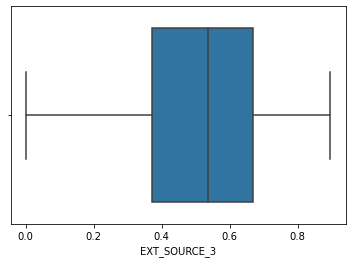

In [48]:
# Analysing Outlier in 'EXT_SOURCE_3' column
outlier_info('EXT_SOURCE_3')

##### No outlier in 'EXT_SOURCE_3 column

count    307510.000000
mean          2.632870
std           2.281344
min           0.000000
50%           2.000000
75%           4.000000
90%           6.000000
95%           7.000000
96%           7.000000
97%           7.000000
98%           8.000000
99%           9.000000
max          12.000000
Name: YRS_LAST_PHONE_CHANGE, dtype: float64
All the values out of the range (-3.5, 8.5) is a suspicious outlier.
All the values out of the range (-8.0, 13.0) is a confirmed outlier.


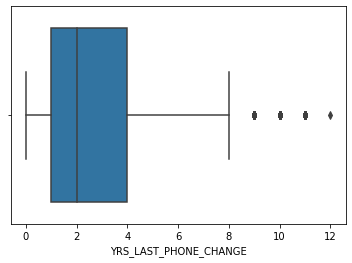

In [49]:
# Analysing Outlier in 'EXT_SOURCE_3' column
outlier_info('YRS_LAST_PHONE_CHANGE')

##### These values are possible so we need not remove any outlier from 'YRS_LAST_PHONE_CHANGE' column 

### Some Other modifications on the rows and columns

##### For categorical columns 

##### To reduce variance and to have clear observations we will remove categories with very less no of values 

In [50]:
# Reducing categories in 'CNT_CHILDREN' column
app_data['CNT_CHILDREN']=app_data['CNT_CHILDREN'].apply(lambda x: '4+' if x>=5 else x)

In [51]:
app_data['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
4+       126
Name: CNT_CHILDREN, dtype: int64

In [52]:
# Reducing categories in 'NAME_INCOME_TYPE' column
app_data['NAME_INCOME_TYPE']=app_data['NAME_INCOME_TYPE'].apply(lambda x: 'Others' if x in ['Maternity leave','Businessman','Student','Unemployed'] else x)

In [53]:
app_data['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Others                      55
Name: NAME_INCOME_TYPE, dtype: int64

In [54]:
# Removing 'Unknown' category from app_data 'NAME_FAMILY_STATUS' column as it had only 2 values so it can't be a new segment.
app_data.drop(app_data[app_data['NAME_FAMILY_STATUS'] == 'Unknown'].index, inplace = True) 

In [55]:
app_data['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      0
Name: NAME_FAMILY_STATUS, dtype: int64

In [56]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'AGE', 'YRS_EMPLOYED', 'YRS_REGISTRATION',
       'YRS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'YRS_LAST_PHONE_CHANGE', 'TOTAL_ENQ_YR', 'REALTY_CAR', 'TOT_DOC_SUB',

In [57]:
# Reducing categories in CNT_FAM_MEMBERS column
app_data['CNT_FAM_MEMBERS']=app_data['CNT_FAM_MEMBERS'].apply(lambda x: '5+' if x>=6 else x)

In [58]:
app_data['CNT_FAM_MEMBERS'].value_counts()

2.0    158357
1.0     67847
3.0     52601
4.0     24697
5.0      3478
5+        529
Name: CNT_FAM_MEMBERS, dtype: int64

In [59]:
# Reducing categories in OBS_30_CNT_SOCIAL_CIRCLE column
app_data['OBS_30_CNT_SOCIAL_CIRCLE']=app_data['OBS_30_CNT_SOCIAL_CIRCLE'].apply(lambda x: '10+' if x>=10 else x)

In [60]:
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0    163910
1.0     48782
2.0     29808
3.0     20321
4.0     14143
5.0      9553
6.0      6453
7.0      4390
10+      4158
8.0      2967
9.0      2003
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [61]:
# Reducing categories in DEF_30_CNT_SOCIAL_CIRCLE column
app_data['DEF_30_CNT_SOCIAL_CIRCLE']=app_data['DEF_30_CNT_SOCIAL_CIRCLE'].apply(lambda x: '3+' if x>=4 else x)

In [62]:
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0    271322
1.0     28328
2.0      5323
3.0      1192
3+        323
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [63]:
# Reducing categories in OBS_60_CNT_SOCIAL_CIRCLE column
app_data['OBS_60_CNT_SOCIAL_CIRCLE']=app_data['OBS_60_CNT_SOCIAL_CIRCLE'].apply(lambda x: '10+' if x>=11 else x)

In [64]:
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     164666
1.0      48869
2.0      29766
3.0      20214
4.0      13946
5.0       9463
6.0       6349
7.0       4344
8.0       2886
10+       2691
9.0       1959
10.0      1335
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [65]:
# Reducing categories in 'DEF_60_CNT_SOCIAL_CIRCLE' column
app_data['DEF_60_CNT_SOCIAL_CIRCLE']=app_data['DEF_60_CNT_SOCIAL_CIRCLE'].apply(lambda x: '2+' if x>=3 else x)

In [66]:
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0    280719
1.0     21841
2.0      3170
2+        758
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [67]:
# Reducing categories in 'YRS_LAST_PHONE_CHANGE' column
app_data['YRS_LAST_PHONE_CHANGE']=app_data['YRS_LAST_PHONE_CHANGE'].apply(lambda x: '7+' if x>=8 else x)

In [68]:
app_data['YRS_LAST_PHONE_CHANGE'].value_counts()

0.0    64176
1.0    58998
2.0    48139
4.0    34677
3.0    32321
5.0    31080
6.0    16620
7.0    12631
7+      8866
Name: YRS_LAST_PHONE_CHANGE, dtype: int64

In [69]:
# Reducing categories in TOTAL_ENQ_YR column
app_data['TOTAL_ENQ_YR']=app_data['TOTAL_ENQ_YR'].apply(lambda x: '10+' if x>=11 else x)

In [70]:
app_data['TOTAL_ENQ_YR'].value_counts()

1.0     53913
2.0     51559
0.0     50911
3.0     39380
4.0     27241
5.0     17248
6.0     10775
7.0      6428
8.0      3834
9.0      2273
10+      1374
10.0     1055
Name: TOTAL_ENQ_YR, dtype: int64

##### Binning some of the Numerical columns 

In [71]:
# Binning the AGE column and divide them into 5 categories according to age.
app_data['AGE']=pd.cut(app_data['AGE'],[20,30,40,50,60,90],labels=['20-30','30-40','40-50','50-60','60+'])

In [72]:
app_data['AGE'].value_counts()

30-40    82768
40-50    75509
50-60    67955
20-30    48869
60+      32408
Name: AGE, dtype: int64

In [73]:
# Binning the 'YRS_REGISTRATION'column and divide them into 5 categories according to number of years.
app_data['YRS_REGISTRATION']=pd.cut(app_data['YRS_REGISTRATION'],[0,10,20,30,50,500],labels=['0-10','10-20','20-30','30-50','50+'])

In [74]:
app_data['YRS_REGISTRATION'].value_counts()

0-10     122276
10-20     99412
20-30     59288
30-50     17457
50+          69
Name: YRS_REGISTRATION, dtype: int64

In [75]:
# Binning the column 'YRS_EMPLOYED' and divide them into 5 categories according to number of years.
app_data['YRS_EMPLOYED']=pd.cut(app_data['YRS_EMPLOYED'],[0,10,20,30,50,5000],labels=['0-10','10-20','20-30','30-50','Not_valid'])

In [76]:
app_data['YRS_EMPLOYED'].value_counts()

0-10         195272
Not_valid     55374
10-20         35437
20-30          8923
30-50          2751
Name: YRS_EMPLOYED, dtype: int64

In [77]:
# Binning the 'YRS_ID_PUBLISH' column and divide them into 4 categories according to number of years.
app_data['YRS_ID_PUBLISH']=pd.cut(app_data['YRS_ID_PUBLISH'],[0,5,10,15,20],labels=['0-5','5-10','10-15','15-20'])

In [78]:
app_data['YRS_ID_PUBLISH'].value_counts()

10-15    123766
5-10      91619
0-5       82674
15-20      1589
Name: YRS_ID_PUBLISH, dtype: int64

In [79]:
# Dividing the 'REGION_POPULATION_RELATIVE' column into 4 categories
app_data['REGION_POPULATION_RELATIVE']=pd.qcut(app_data['REGION_POPULATION_RELATIVE'],[0, .25, .5, .75, 1.],labels=['Low','Medium','High','Very High'])

In [80]:
app_data['REGION_POPULATION_RELATIVE'].value_counts()

High         81972
Medium       79032
Low          78124
Very High    68381
Name: REGION_POPULATION_RELATIVE, dtype: int64

In [81]:
# Dropping some of the unnessary columns which is not related to our analysis or is repeated
app_data.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REGION_RATING_CLIENT_W_CITY','LIVE_REGION_NOT_WORK_REGION','REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION'],axis=1,inplace=True)

In [82]:
# Now our data is ready for Analysis and looks like this
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YRS_EMPLOYED,YRS_REGISTRATION,YRS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YRS_LAST_PHONE_CHANGE,TOTAL_ENQ_YR,REALTY_CAR,TOT_DOC_SUB,TOTAL_CONT_POINT
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Medium,20-30,0-10,0-10,5-10,Laborers,1,2,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,3,1,Only Realty,1,4
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,Low,40-50,0-10,0-10,0-5,Core staff,2,1,0,0,0,School,0.622246,NaN,1,0,1,0,2,0,No Car and Realty,1,4
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Medium,50-60,0-10,10-20,5-10,Laborers,1,2,0,0,0,Government,0.555912,0.729567,0,0,0,0,2,0,Both Car and Realty,0,5
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Low,50-60,0-10,20-30,5-10,Laborers,2,2,0,0,0,Business Entity Type 3,0.650442,NaN,2,0,2,0,2,NaN,Only Realty,1,3
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,High,50-60,0-10,10-20,5-10,Core staff,1,2,0,1,1,Religion,0.322738,NaN,0,0,0,0,3,0,Only Realty,1,3


In [83]:
app_data.shape

(307509, 37)

### Analysis

### Univariate analysis

##### Categorical Columns

In [84]:
# Determining the imbalance in the data
app_data['TARGET'].value_counts(normalize=True)*100

0    91.927066
1     8.072934
Name: TARGET, dtype: float64

##### The data is imbalanced with 11:1 ratio 

In [85]:
# Lets divide the dataset into two sets based on Target 1 and Target 0
df0=app_data[app_data['TARGET']==0]
df1=app_data[app_data['TARGET']==1]

##### Categorical variable analysis 

In [86]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'AGE', 'YRS_EMPLOYED', 'YRS_REGISTRATION',
       'YRS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'YRS_LAST_PHONE_CHANGE', 'TOTAL_ENQ_YR', 'REALTY_CAR', 'TOT_DOC_SUB',
       'TOTAL_CONT_POINT'],
      dtype='object')

In [87]:
categorical=['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'AGE', 'YRS_EMPLOYED', 'YRS_REGISTRATION',
       'YRS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'YRS_LAST_PHONE_CHANGE', 'TOTAL_ENQ_YR', 'REALTY_CAR', 'TOT_DOC_SUB',
       'TOTAL_CONT_POINT']

In [88]:
len(categorical)

33

In [89]:
# General fn for univariate analysis of categorical variable
def uni_cat_analysis(z):
    plt.figure(figsize=[25,8])
    plt.subplot(1,3,1)
    plt.title('Non-Defaulter')
    graph = sns.countplot(x=z, data=df0)
    graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
    i=0
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,
            df0[z].value_counts()[i],ha="center")
        i += 1

    plt.subplot(1,3,2)
    plt.title('Defaulter')
    graph = sns.countplot(x=z, data=df1)
    graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
    i=0
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,
            df1[z].value_counts()[i],ha="center")
        i += 1
    plt.subplot(1,3,3)
    plt.title('Default wrt Categories')
    plt.xlabel(z)
    plt.ylabel('Default %')
    (100*app_data[z][app_data['TARGET']==1].value_counts()/app_data[z].value_counts()).plot(kind='bar')
    print('Default % according to category for {} column is :'.format(z))
    print((100*app_data[z][app_data['TARGET']==1].value_counts()/app_data[z].value_counts()).sort_values(ascending=False))

Default % according to category for NAME_CONTRACT_TYPE column is :
Cash loans         8.345913
Revolving loans    5.478703
Name: NAME_CONTRACT_TYPE, dtype: float64


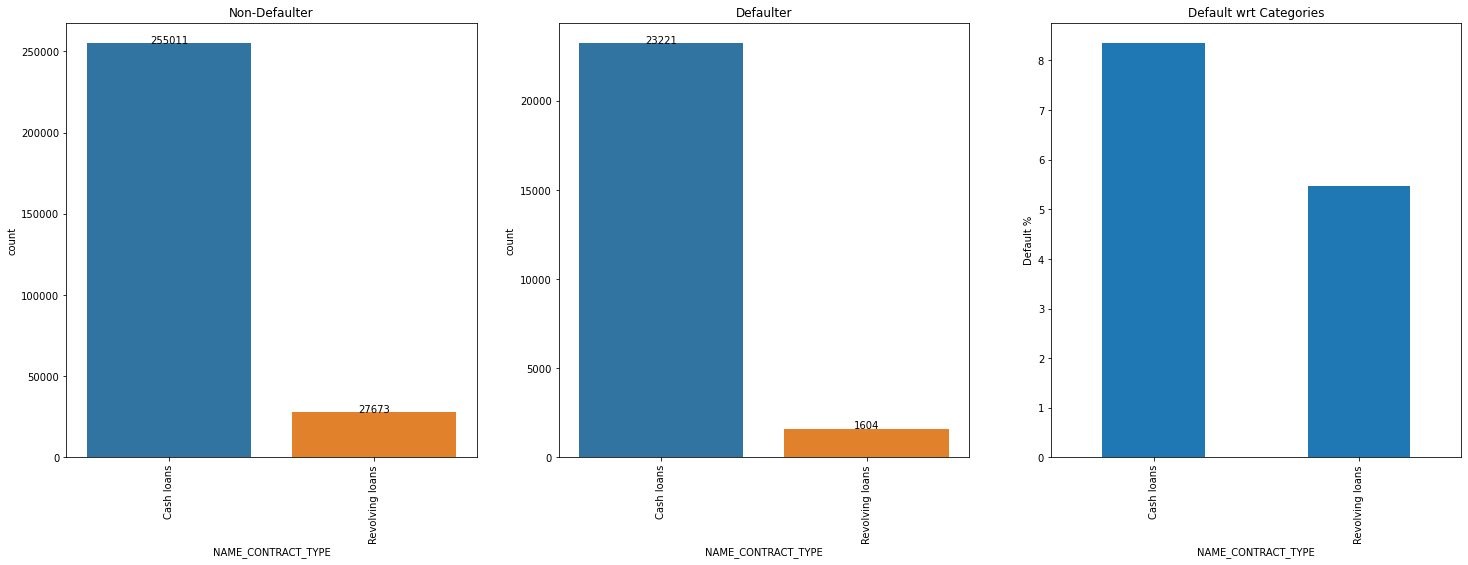

In [90]:
# Univariate analysis for 'NAME_CONTRACT_TYPE' column 
uni_cat_analysis('NAME_CONTRACT_TYPE')

##### Inferences:
- It is clear that both defaulter and non-defaulter avail more cash loans compared to revolving loans.

- Default % is higher in "Cash loan" category versus "Revolving loan" category.

posx and posy should be finite values
posx and posy should be finite values


Default % according to category for CODE_GENDER column is :
M      10.142017
F       6.999363
XNA     0.000000
Name: CODE_GENDER, dtype: float64


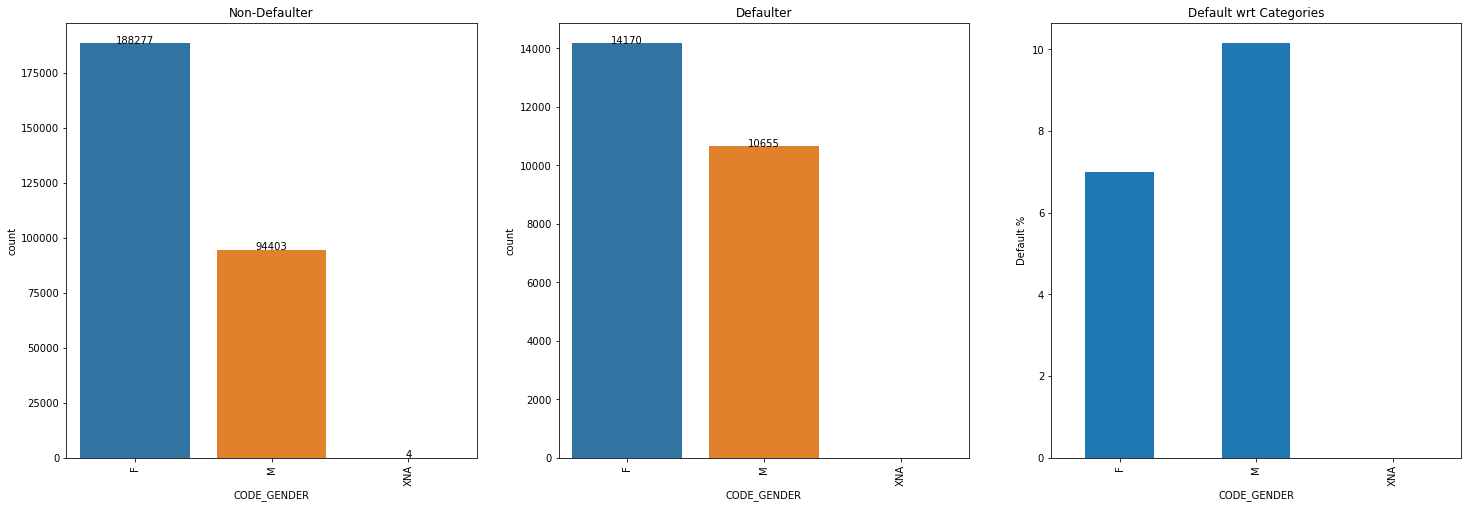

In [91]:
# Univariate analysis for 'CODE_GENDER' column
uni_cat_analysis('CODE_GENDER')

#####  Inferences:
- We can observe that "Female" category have taken more number of loans compared to "Male" category.
- Default % of Male category is higher at 10%, as compared to Female category at 7%.

Default % according to category for CNT_FAM_MEMBERS column is :
5+     13.232514
5.0     9.401955
3.0     8.760290
4.0     8.648824
1.0     8.364408
2.0     7.583498
Name: CNT_FAM_MEMBERS, dtype: float64


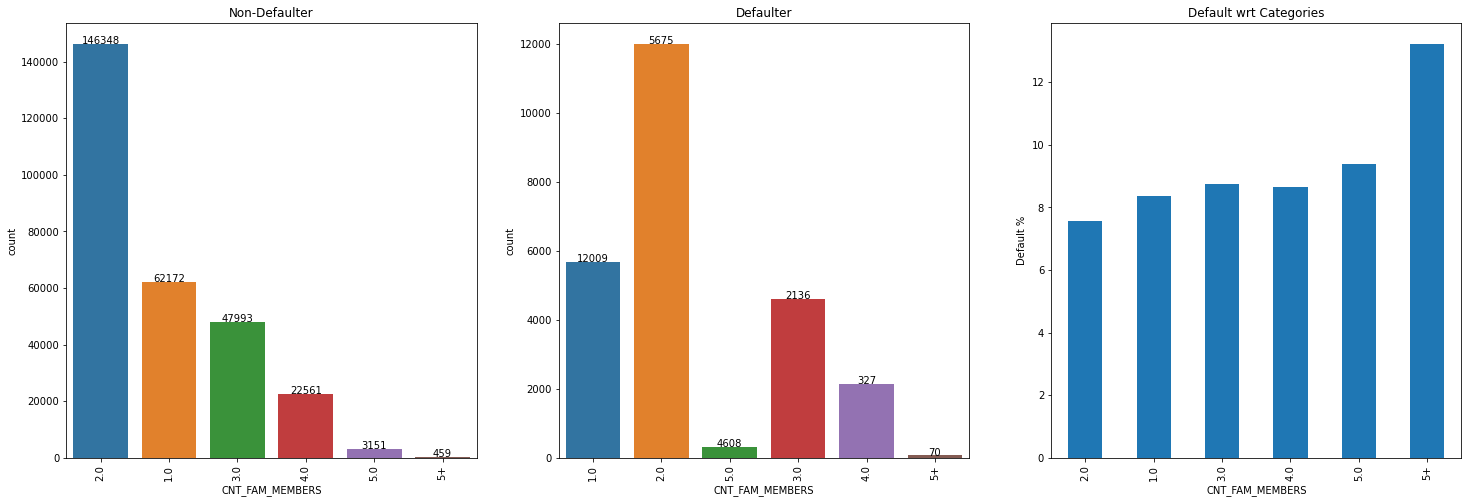

In [92]:
# Univariate analysis for CNT_FAM_MEMBERS column
uni_cat_analysis('CNT_FAM_MEMBERS')

##### Inferences:
- We can observe that maximum number of loans are availed by people with two family members, and they have the least default %.
- Whereas the highest defaults are made by people who have more than 5 family members in their family. 

Default % according to category for NAME_TYPE_SUITE column is :
Other_B            9.830508
Other_A            8.775982
Group of people    8.487085
Unaccompanied      8.183047
Spouse, partner    7.871592
Family             7.494583
Children           7.376798
Name: NAME_TYPE_SUITE, dtype: float64


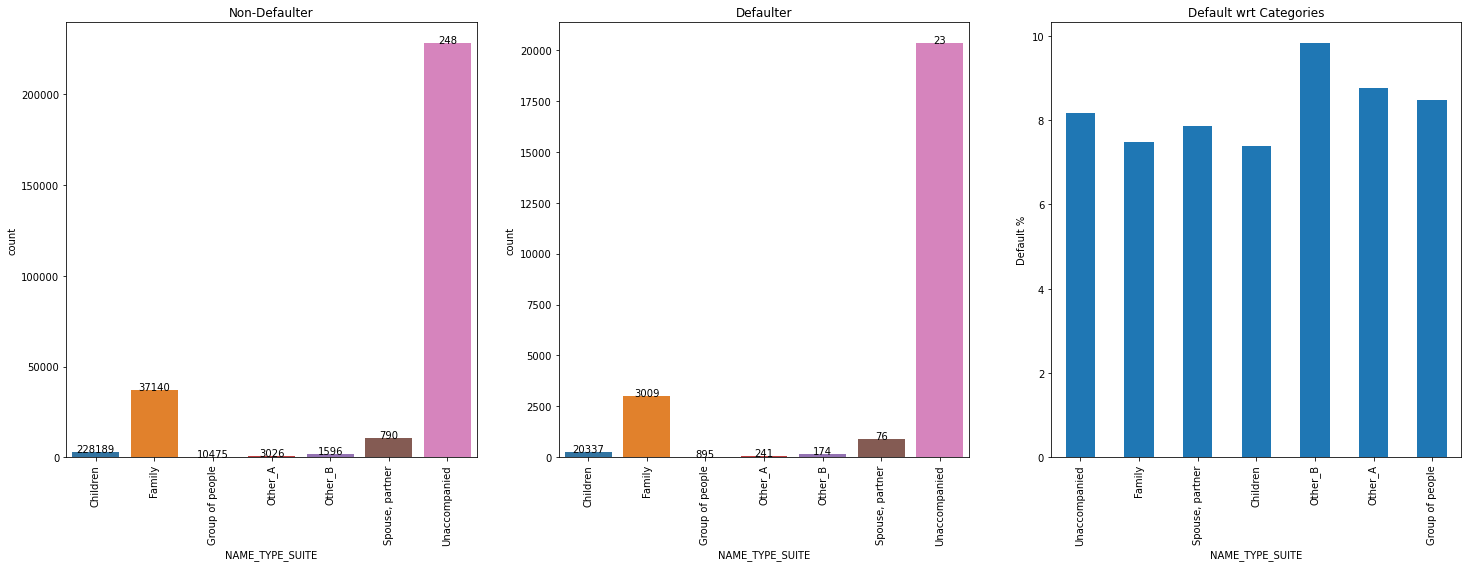

In [93]:
# Univariate analysis for NAME_TYPE_SUITE column
uni_cat_analysis('NAME_TYPE_SUITE')

##### Inferences:
- We can observe that most applicants came unaccompained. Applicants who came with their children have less defaults.
- Most defaults are done by applicants who come under category "Other_B".

Default % according to category for NAME_INCOME_TYPE column is :
Others                  18.181818
Working                  9.588472
Commercial associate     7.484466
State servant            5.754965
Pensioner                5.386366
Name: NAME_INCOME_TYPE, dtype: float64


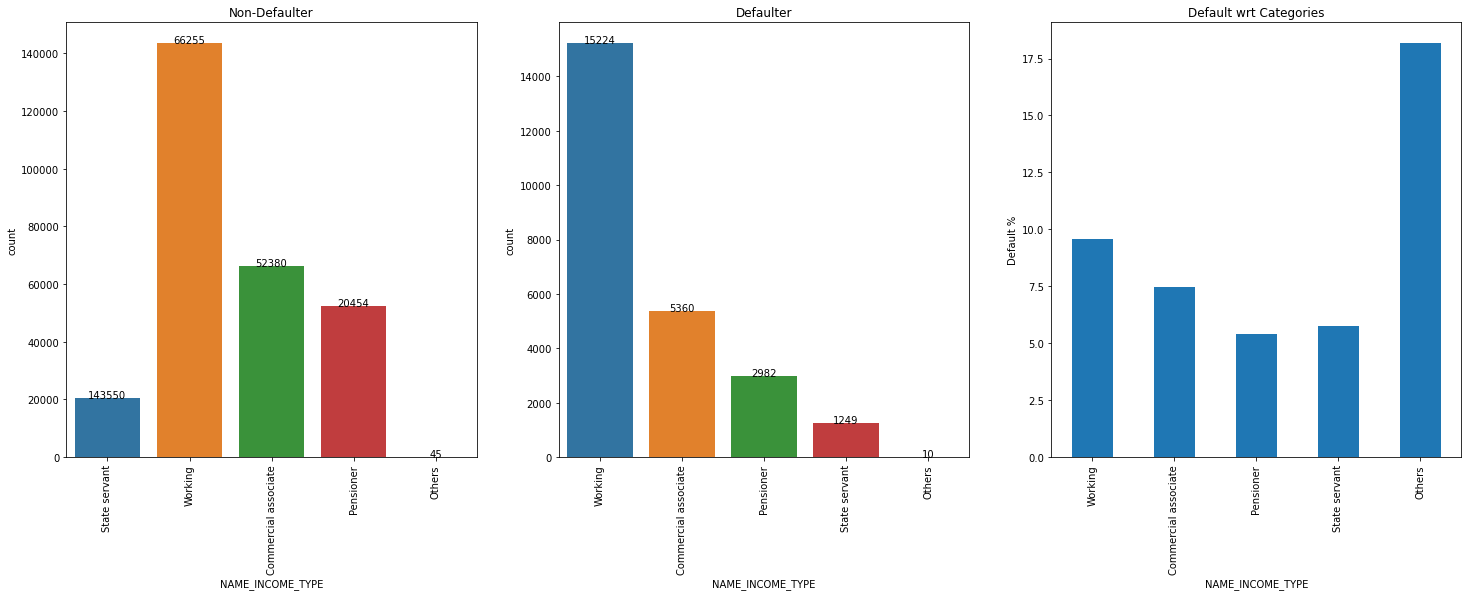

In [94]:
# Univariate analysis for 'NAME_INCOME_TYPE' column
uni_cat_analysis('NAME_INCOME_TYPE')

##### Inferences:
- Most number of Loans were taken by "Working" category people.
- "Pensioner" category is the safest group to grant loans to.
- "Others" category which includes (Maternity leave, Businessman, Student, Unemployed) have the highest default rate of 18% and bank must be vigilant prior to granting loans to this category. 
- Bank is providing more number of loans to the "Working" category, which has the second highest default rate.

Default % according to category for NAME_EDUCATION_TYPE column is :
Lower secondary                  10.930537
Secondary / secondary special     8.939929
Incomplete higher                 8.484966
Higher education                  5.355187
Academic degree                   1.829268
Name: NAME_EDUCATION_TYPE, dtype: float64


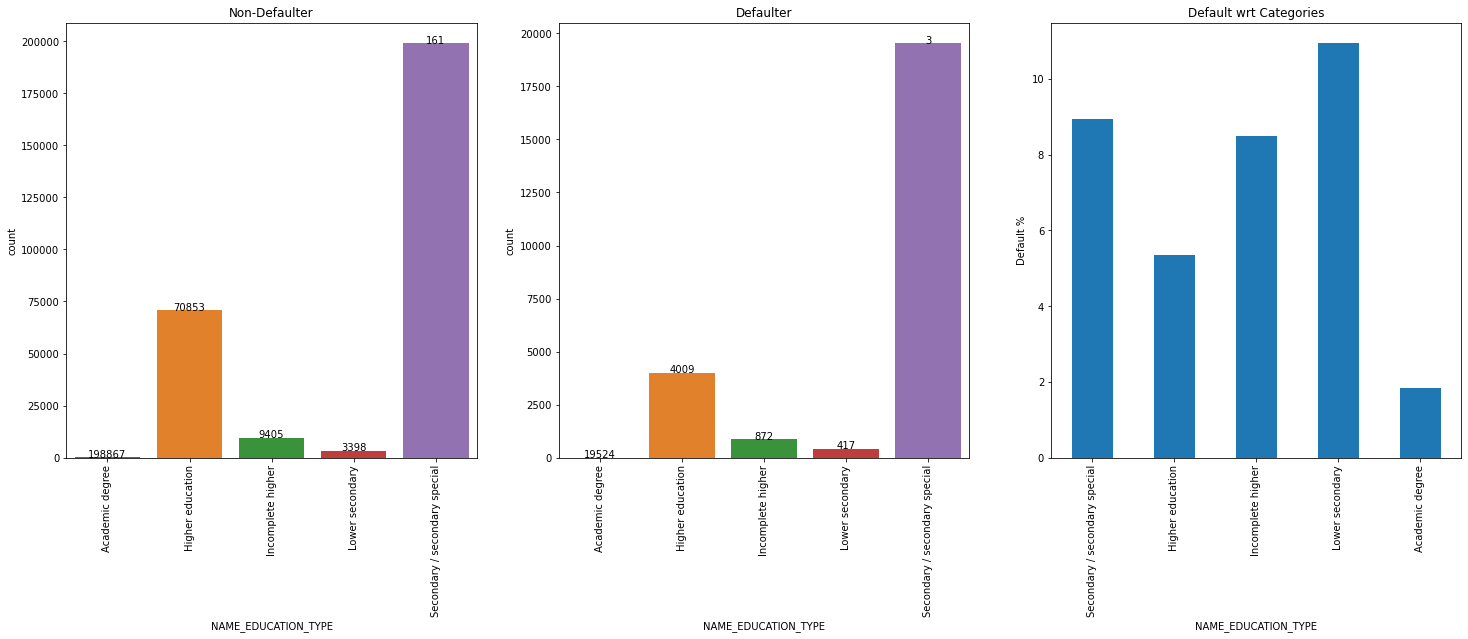

In [95]:
# Univariate analysis for 'NAME_EDUCATION_TYPE' column
uni_cat_analysis('NAME_EDUCATION_TYPE')

##### Inferences:
- There is a trend which reflects that education level and default % are inversely related to each other.
- Most people availing loans are from the "Secondary / Secondary special" category, which is the second highest default making category. It is recommended that the bank should target more towards "Academic degree" category people, as it has the lowest default %.
- "Lower secondary" category has the highest default %, i.e. nearly 11%.

posx and posy should be finite values
posx and posy should be finite values


Default % according to category for NAME_FAMILY_STATUS column is :
Civil marriage          9.944584
Single / not married    9.807675
Separated               8.194234
Married                 7.559868
Widow                   5.824217
Unknown                      NaN
Name: NAME_FAMILY_STATUS, dtype: float64


posx and posy should be finite values
posx and posy should be finite values


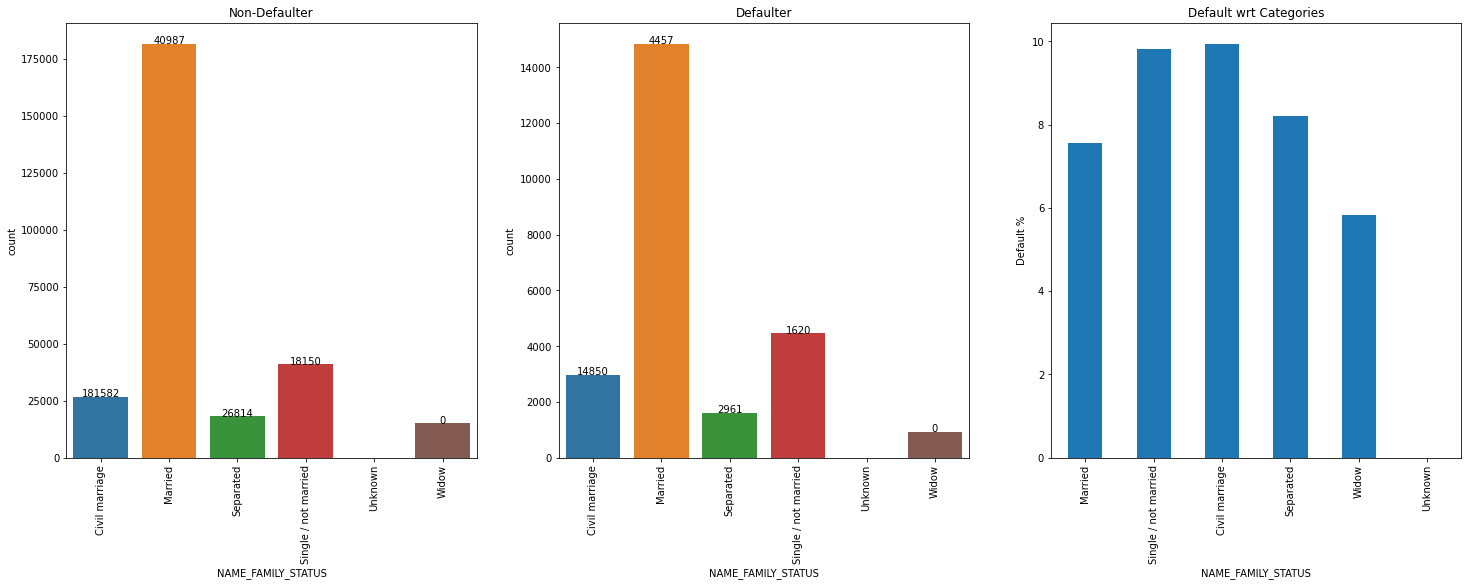

In [96]:
# Univariate analysis for 'NAME_FAMILY_STATUS' column
uni_cat_analysis('NAME_FAMILY_STATUS')

##### Inferences:
- It is evident that maximum number of loans are availed by "Married" people category.
- Highest defaulting categories are "Single / not married" and "Civil marriage".

Default % according to category for NAME_HOUSING_TYPE column is :
Rented apartment       12.313051
With parents           11.698113
Municipal apartment     8.540512
Co-op apartment         7.932264
House / apartment       7.795739
Office apartment        6.572411
Name: NAME_HOUSING_TYPE, dtype: float64


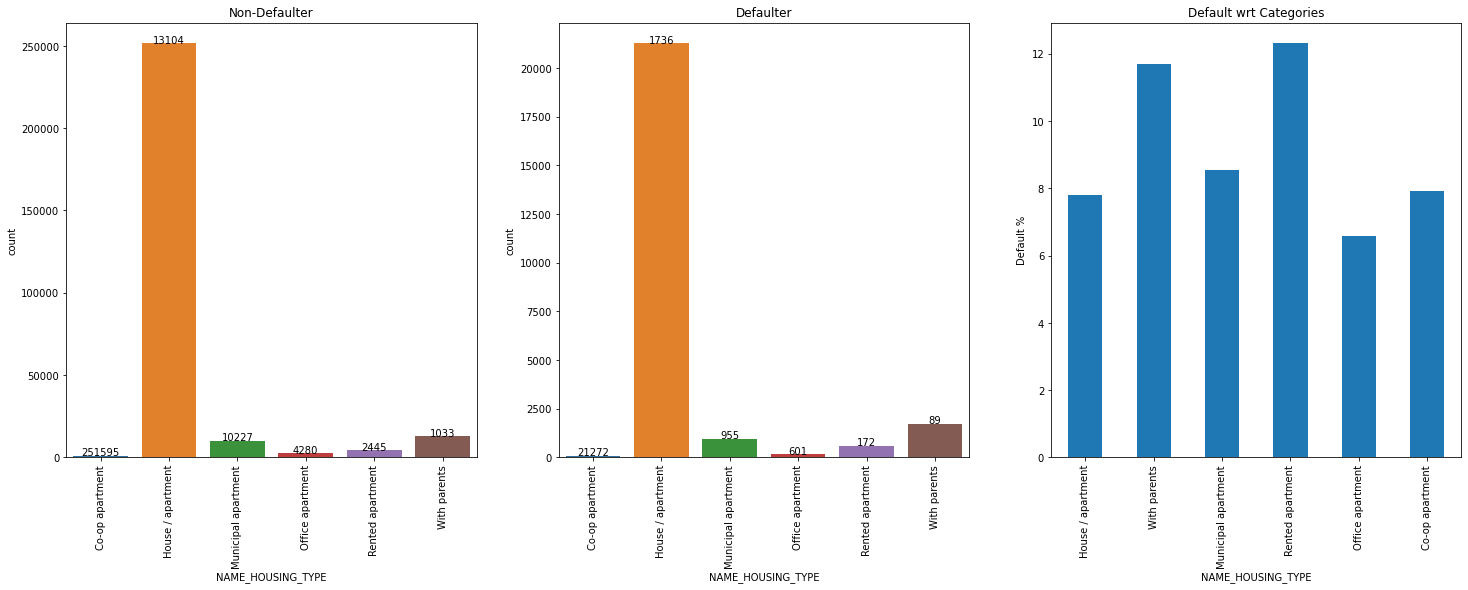

In [97]:
# Univariate analysis for 'NAME_HOUSING_TYPE' column
uni_cat_analysis('NAME_HOUSING_TYPE')

##### Inferences:
- Most number of loans are availed by House / apartment category people.
- Highest default is made by "Rented apartment" category people, i.e around 12% and lowest default is by "Office apartment" category, i.e. nearly 6.5%.

Default % according to category for AGE column is :
20-30    11.444883
30-40     9.434806
40-50     7.581878
50-60     6.036348
60+       4.924710
Name: AGE, dtype: float64


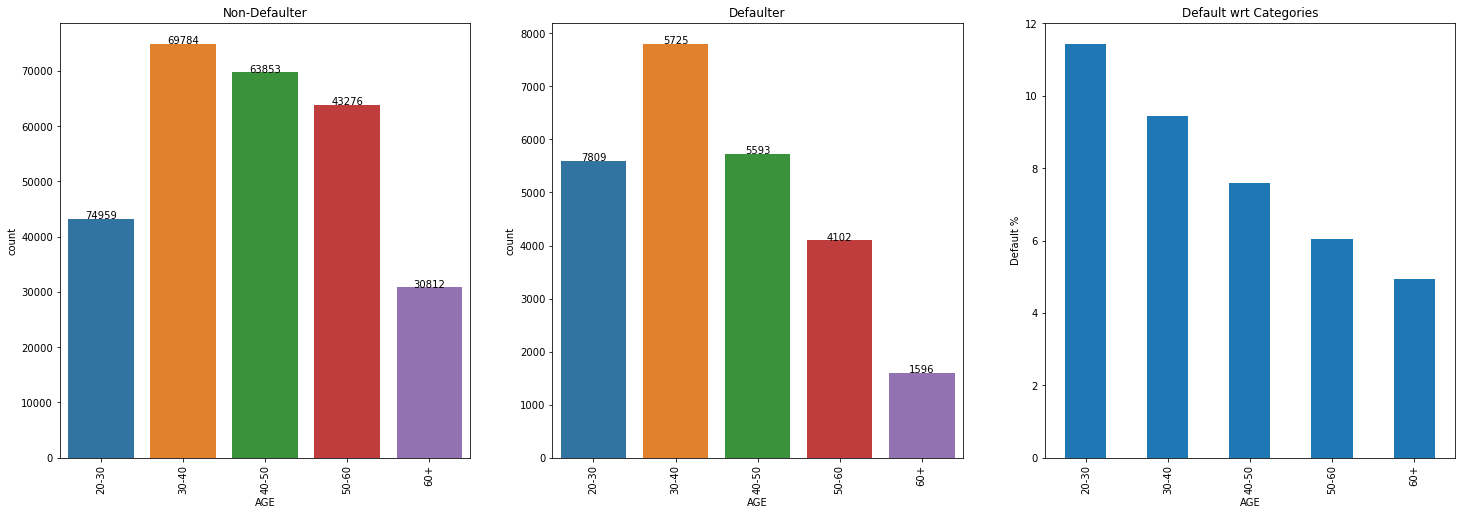

In [98]:
# Univariate analysis for 'AGE' column
uni_cat_analysis('AGE')

##### Inferences:
- There is a clear relation which says that higher the age, lower is the chance of making a default.
- Most number of loans are given to "20-30" and "30-40" categories and they hold the highest default % of 11.4% and 9.4% respectively. It may be a good approach for bank to consider providing loans at a higher interest rate to these categories, in order to control/reduce the number of defaults.

Default % according to category for YRS_EMPLOYED column is :
0-10         9.426851
Not_valid    5.399646
10-20        5.358806
20-30        4.594867
30-50        3.053435
Name: YRS_EMPLOYED, dtype: float64


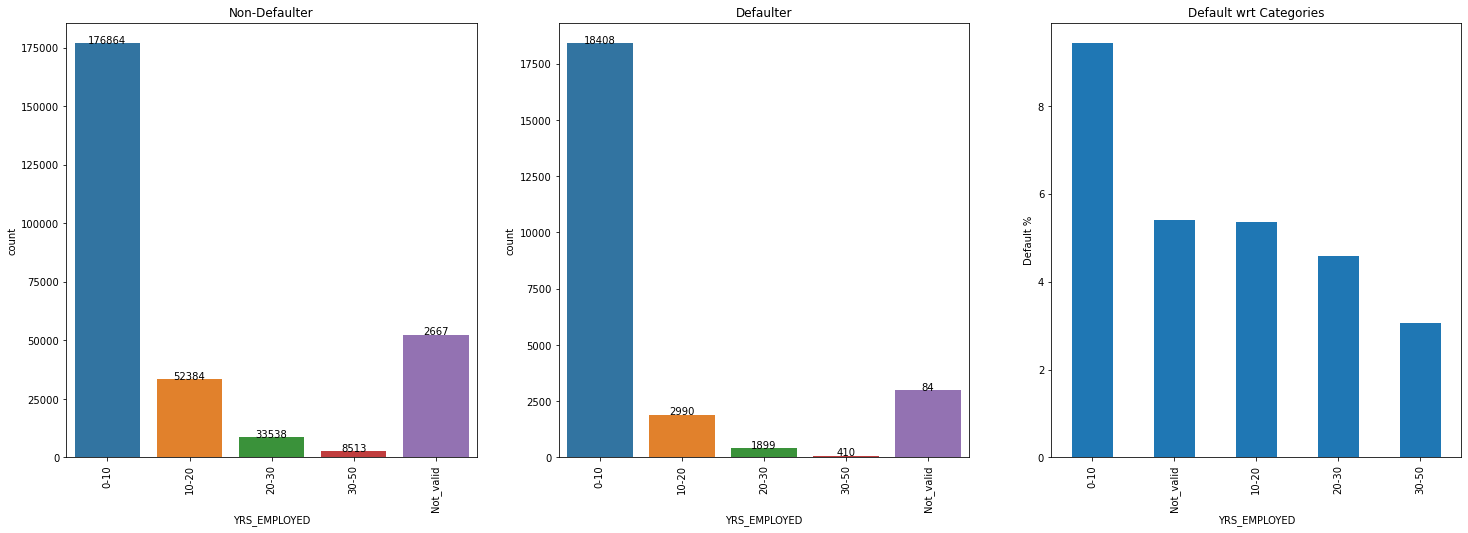

In [99]:
# Univariate analysis for 'YRS_EMPLOYED' column
uni_cat_analysis('YRS_EMPLOYED')

##### Inference:
- Higher the experience level, lower chance to default.

Default % according to category for OCCUPATION_TYPE column is :
Low-skill Laborers       17.152413
Drivers                  11.326130
Waiters/barmen staff     11.275964
Security staff           10.742449
Laborers                 10.578770
Cooking staff            10.443996
Sales staff               9.631799
Cleaning staff            9.606705
Realty agents             7.856192
Secretaries               7.049808
Medicine staff            6.700246
Private service staff     6.598793
IT staff                  6.463878
HR staff                  6.394316
Core staff                6.303954
Managers                  6.214319
High skill tech staff     6.159930
Accountants               4.830819
Name: OCCUPATION_TYPE, dtype: float64


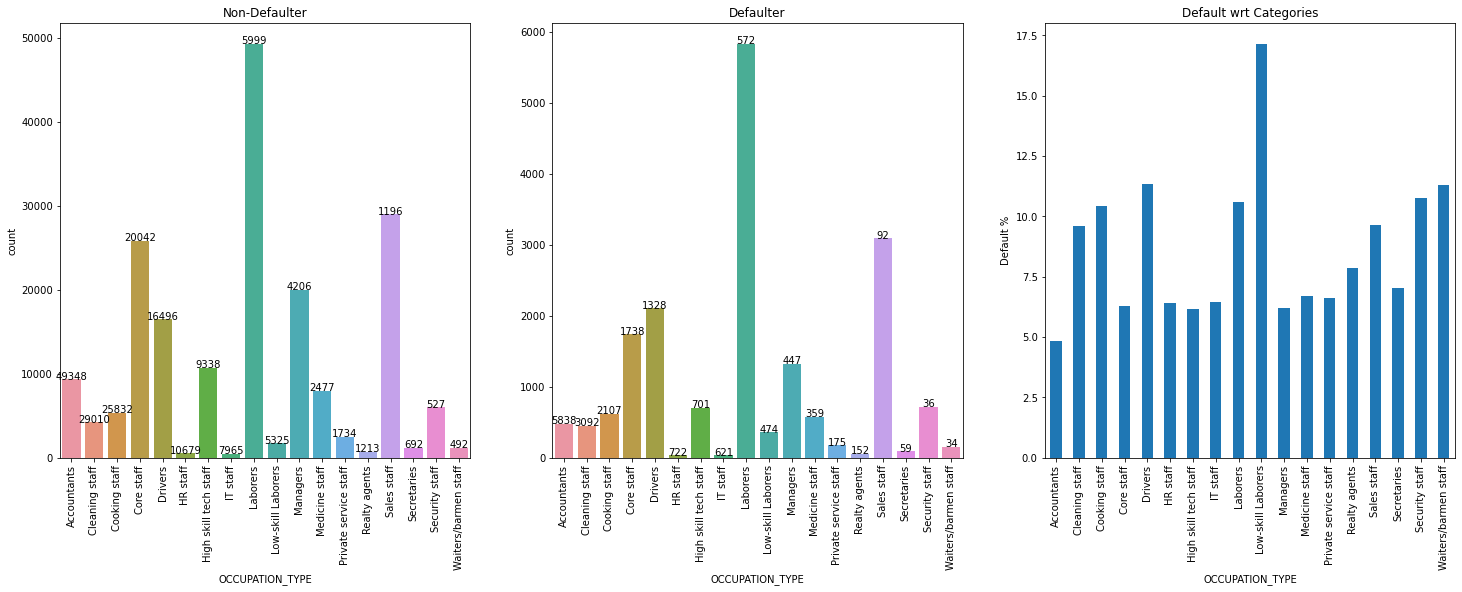

In [100]:
# Univariate analysis for 'OCCUPATION_TYPE' column
uni_cat_analysis('OCCUPATION_TYPE')

##### Inferences:

- We can observe that highest loans are taken by "Laborers" category and has a default rate of around 11%. The bank must be vigilant when granting loans to this this category.
- Highest default is made by "Low-skill Laborers" category, i.e., around 17% and the lowest default % is "Accountants" category, i.e. around 5%.

Default % according to category for REGION_RATING_CLIENT column is :
3    11.102835
2     7.889172
1     4.820325
Name: REGION_RATING_CLIENT, dtype: float64


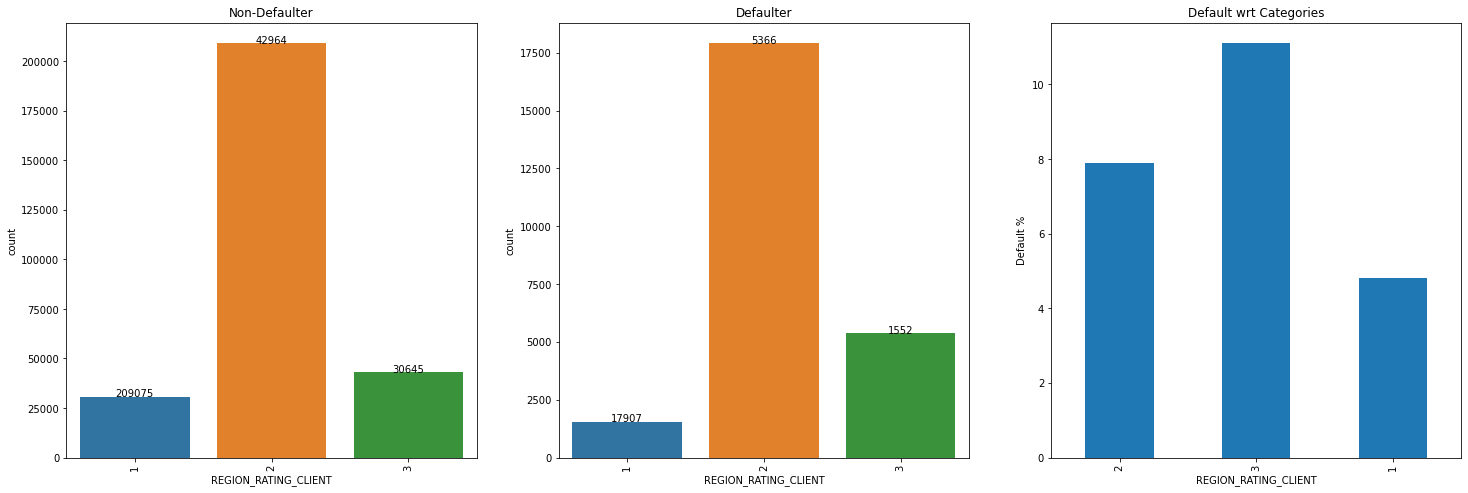

In [101]:
# Univariate analysis for 'REGION_RATING_CLIENT' column
uni_cat_analysis('REGION_RATING_CLIENT')

##### Inferences:
- "2nd class region" category is availing highest number of loans and has a default rate of around 8%.
- Bank is providing a lot of loans to the people living in "3rd class region" category, this could be risky as they have the highest default rate of 11%. Bank should consider providing more loans to "1st class region" category, as they have low default rate of around 5%.

Default % according to category for REALTY_CAR column is :
No Car and Realty      8.991157
Only Realty            8.284498
Both Car and Realty    7.332781
Only Car               7.043783
Name: REALTY_CAR, dtype: float64


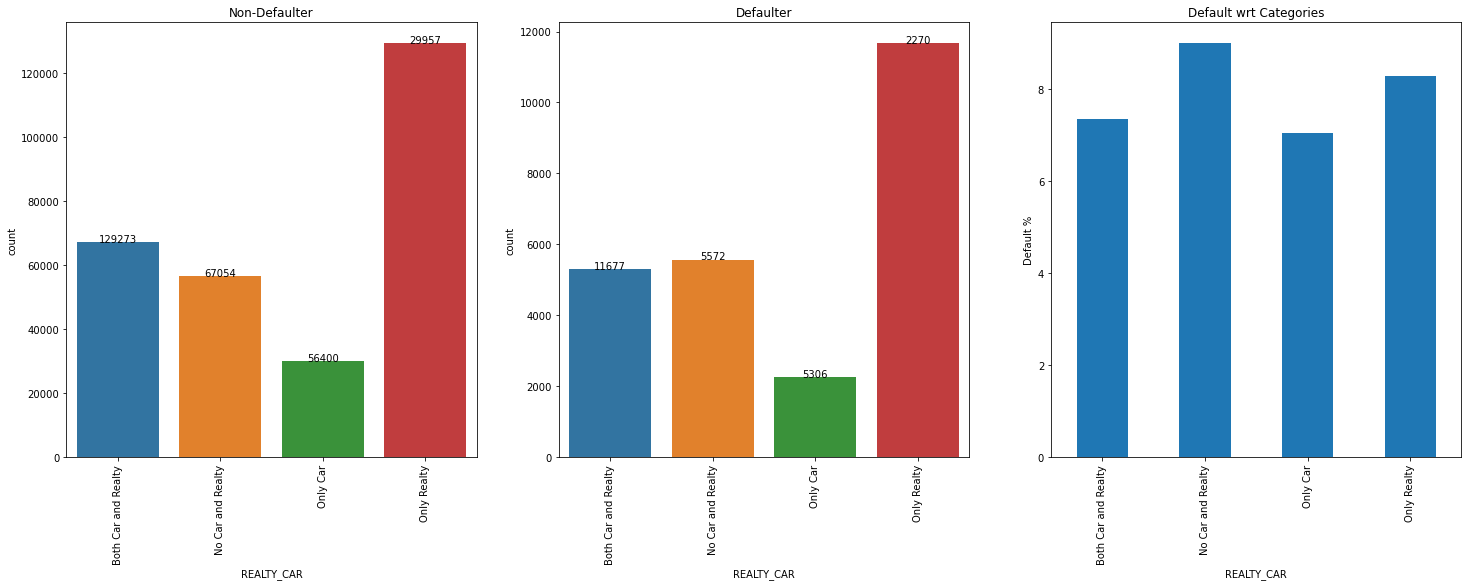

In [102]:
# Univariate analysis for 'REALTY_CAR' column
uni_cat_analysis('REALTY_CAR')

##### Inferences:
- Highest number of loans are taken by "Only Realty" category people and they have a high default rate of around 8%. Bank has to be more vigilant on this.
- Highest number of defaults are done by people of "No Car and Realty" category, i.e. around 9%.

Default % according to category for DEF_60_CNT_SOCIAL_CIRCLE column is :
2+     14.907652
2.0    12.145110
1.0    10.516918
0.0     7.834881
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


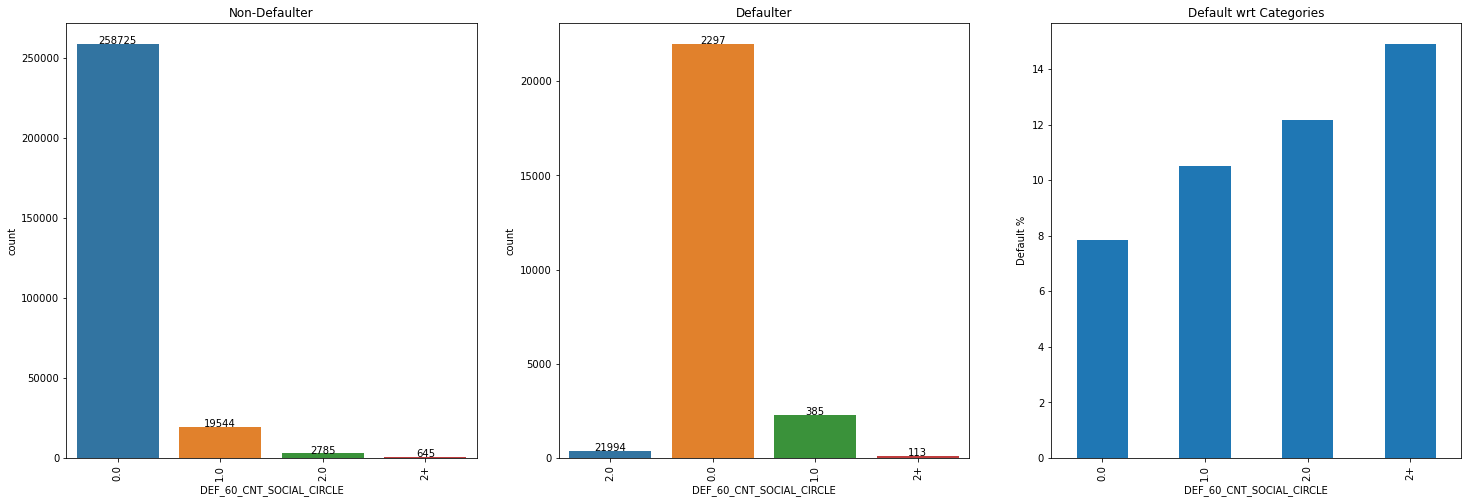

In [103]:
# Univariate analysis for 'DEF_60_CNT_SOCIAL_CIRCLE' column
uni_cat_analysis('DEF_60_CNT_SOCIAL_CIRCLE')


##### Inferences:
- Most people who availed loans belong to "0" category.
- A positive note, bank is aware of this correlation and is granting very few loans to people of "2 and 2+" categories.
- There is a clear trend which says, higher the default in last 60 days or more, higher is the chance for default of loan.

##### Numerical column Univariate analysis 


In [104]:
# General fn for numerical univariate analysis
def uni_numerical(z):
    plt.figure(figsize=[15,6])
    plt.title('Density plot of {} column'.format(z))
    plt.ylabel('Density')
    sns.distplot(df0[df0[z]<=df0[z].quantile(0.95)][z],hist=False,label='Non-Defaulter')
    sns.distplot(df1[df1[z]<=df1[z].quantile(0.95)][z],hist=False,label='Defaulter')
    plt.show()
    print('Univariate Analysis')
    bin_labels= ['Low3','Low2', 'Low1',"Low0","High0" ,"High1","High2", "High3"]
    c=pd.DataFrame(pd.qcut(app_data[z],q=[0, .125, .25, .375 ,.5 , .625, .75, .875, 1]).value_counts(sort=False))
    c.reset_index(inplace=True)
    c.index=bin_labels
    c.columns=['Range','Count']
    c.index.name='Labels'
    print(c)
    print()
    print()
    print('Bivariate Analysis')
    app_data['Score Group'] = pd.qcut(app_data[z],q=[0, .125, .25, .375 ,.5 , .625, .75, .875, 1],
                                  labels=bin_labels)

    for group in bin_labels:
        default=round(100*sum(app_data[app_data['Score Group']==group].TARGET)/len(app_data[app_data['Score Group']==group]),2)
        print("{} % of {} Score group defaulted".format(default,group))
    app_data.drop('Score Group',axis=1,inplace=True)

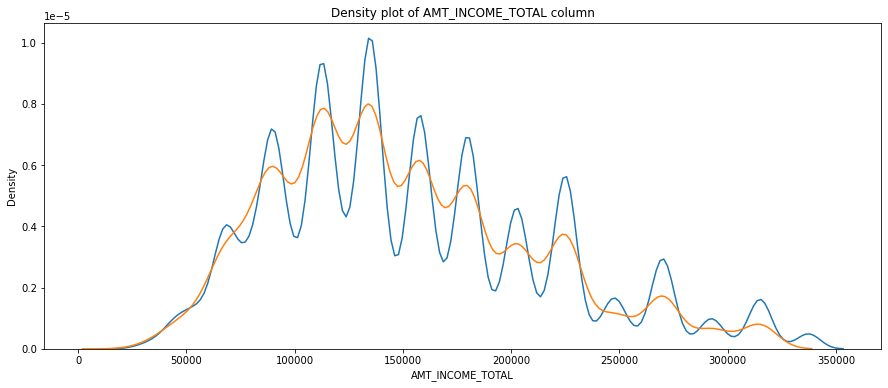

Univariate Analysis
                          Range  Count
Labels                                
Low3       (25649.999, 90000.0]  57922
Low2        (90000.0, 112500.0]  42656
Low1       (112500.0, 135000.0]  48849
Low0       (135000.0, 147150.0]   4333
High0      (147150.0, 180000.0]  61824
High1      (180000.0, 202500.0]  20388
High2      (202500.0, 261000.0]  33354
High3   (261000.0, 117000000.0]  38183


Bivariate Analysis
8.17 % of Low3 Score group defaulted
8.7 % of Low2 Score group defaulted
8.49 % of Low1 Score group defaulted
9.0 % of Low0 Score group defaulted
8.53 % of High0 Score group defaulted
7.98 % of High1 Score group defaulted
7.55 % of High2 Score group defaulted
6.35 % of High3 Score group defaulted


In [105]:
# Univariate/Bivariate analyis of 'AMT_INCOME_TOTAL' column
uni_numerical('AMT_INCOME_TOTAL')

##### Inferences:
- There is a trend here, people with low and high salary are making less defaults. High defaults are made by people in mid salary range.
- Highest default is made by people who earn salary in range of "135000.0 to 147150.0".

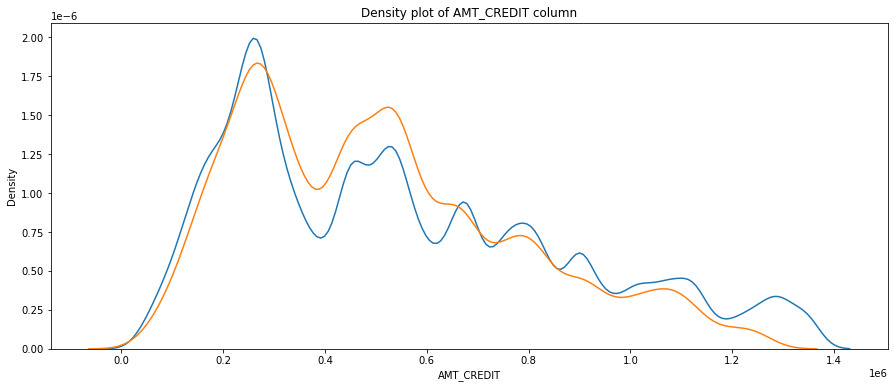

Univariate Analysis
                         Range  Count
Labels                               
Low3     (44999.999, 202500.0]  38567
Low2      (202500.0, 270000.0]  39854
Low1      (270000.0, 385164.0]  36969
Low0      (385164.0, 513531.0]  38459
High0     (513531.0, 646920.0]  38368
High1     (646920.0, 808650.0]  39416
High2    (808650.0, 1078200.0]  37749
High3   (1078200.0, 4050000.0]  38127


Bivariate Analysis
6.87 % of Low3 Score group defaulted
7.6 % of Low2 Score group defaulted
9.66 % of Low1 Score group defaulted
9.7 % of Low0 Score group defaulted
10.65 % of High0 Score group defaulted
7.71 % of High1 Score group defaulted
7.05 % of High2 Score group defaulted
5.39 % of High3 Score group defaulted


In [106]:
# Univariate/Bivariate analysis of 'AMT_CREDIT' column
uni_numerical('AMT_CREDIT')

##### Inferences:
- There is a trend here, people with low and high "AMT_CREDIT" are making less defaults. High defaults are made by people in mid credit range.
- There has been a high default rate between the loan range of "270000 to 800000".

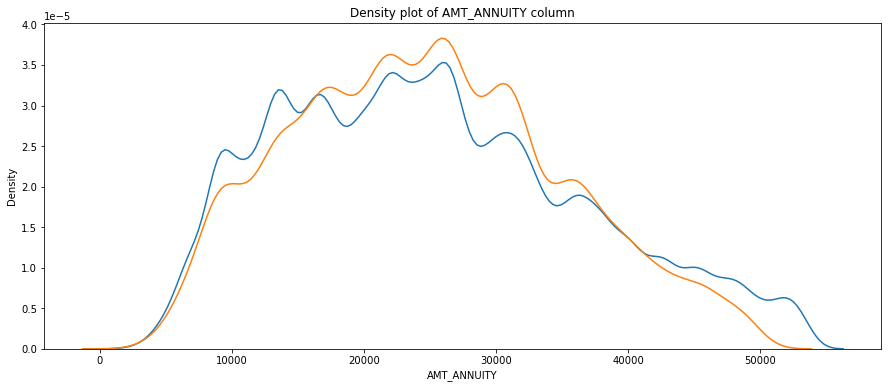

Univariate Analysis
                      Range  Count
Labels                            
Low3    (1615.499, 12222.0]  38441
Low2     (12222.0, 16524.0]  38452
Low1     (16524.0, 21015.0]  38447
Low0     (21015.0, 24903.0]  38433
High0    (24903.0, 29164.5]  38422
High1    (29164.5, 34596.0]  38538
High2    (34596.0, 43245.0]  38328
High3   (43245.0, 258025.5]  38436


Bivariate Analysis
6.91 % of Low3 Score group defaulted
7.21 % of Low2 Score group defaulted
8.78 % of Low1 Score group defaulted
8.73 % of Low0 Score group defaulted
9.14 % of High0 Score group defaulted
9.32 % of High1 Score group defaulted
8.48 % of High2 Score group defaulted
6.01 % of High3 Score group defaulted


In [107]:
# Univariate/Bivariate analysis of 'AMT_ANNUITY' column
uni_numerical('AMT_ANNUITY')

##### Inferences:
- We can observe that mid range installments are being defaulted more than high and low range installments.
- Highest default is made in the installment range of "29164.5 to 34596.0", i.e. 9.3%.

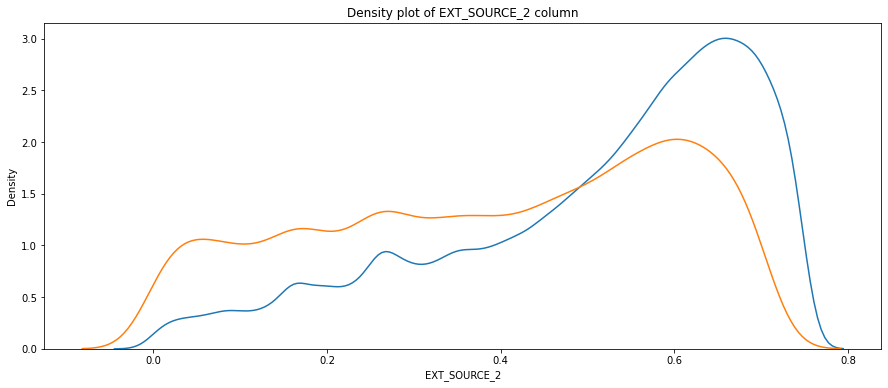

Univariate Analysis
                         Range  Count
Labels                               
Low3    (-0.0009999183, 0.254]  38371
Low2            (0.254, 0.392]  38345
Low1            (0.392, 0.496]  38356
Low0            (0.496, 0.566]  38354
High0           (0.566, 0.618]  38356
High1           (0.618, 0.664]  38356
High2           (0.664, 0.711]  38355
High3           (0.711, 0.855]  38356


Bivariate Analysis
17.4 % of Low3 Score group defaulted
11.18 % of Low2 Score group defaulted
8.83 % of Low1 Score group defaulted
7.52 % of Low0 Score group defaulted
6.61 % of High0 Score group defaulted
5.43 % of High1 Score group defaulted
4.47 % of High2 Score group defaulted
3.14 % of High3 Score group defaulted


In [108]:
# Univariate/Bivariate analyis of 'EXT_SOURCE_2' column
uni_numerical('EXT_SOURCE_2')

#####  Inferences:
- There is clear trend that lower the score, more is the chance to default.
- "Low3 Score" group has the highest default rate of 17.4% and "High3 Score" group has the lowest default rate of 3%.

### Bivariate analysis

##### Numerical analysis

##### Finding correlation between variable wrt target variable 

In [109]:
# Corelation table for df0 or the defaulter dataset
corr=df0.corr()
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack()
corr_df_1=corr_df.reset_index()
corr_df_1.columns=['VAR1','VAR2','CORRELATION']
corr_df_1.dropna(subset=['CORRELATION'],inplace=True)
corr_df_1['CORRELATION']=corr_df_1['CORRELATION'].abs()
corr_df_1.sort_values(by='CORRELATION',ascending=False,inplace=True)
corr_df_1.head(15)

,VAR1,VAR2,CORRELATION
30,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
31,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
23,AMT_ANNUITY,AMT_CREDIT,0.771309
22,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418954
29,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
15,AMT_CREDIT,AMT_INCOME_TOTAL,0.342802
36,EXT_SOURCE_2,AMT_INCOME_TOTAL,0.139591
39,EXT_SOURCE_2,AMT_GOODS_PRICE,0.135694
37,EXT_SOURCE_2,AMT_CREDIT,0.129139
38,EXT_SOURCE_2,AMT_ANNUITY,0.126614


In [110]:
# Corelation table for df1 or the defaulter dataset
corr=df1.corr()
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack()
corr_df=corr_df.reset_index()
corr_df.columns=['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)
corr_df['CORRELATION']=corr_df['CORRELATION'].abs()
corr_df.sort_values(by='CORRELATION',ascending=False,inplace=True)
corr_df.head(15)

,VAR1,VAR2,CORRELATION
30,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
31,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
23,AMT_ANNUITY,AMT_CREDIT,0.752195
39,EXT_SOURCE_2,AMT_GOODS_PRICE,0.131184
37,EXT_SOURCE_2,AMT_CREDIT,0.120848
38,EXT_SOURCE_2,AMT_ANNUITY,0.116305
46,EXT_SOURCE_3,AMT_GOODS_PRICE,0.078754
47,EXT_SOURCE_3,EXT_SOURCE_2,0.077760
44,EXT_SOURCE_3,AMT_CREDIT,0.077698
22,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046421


##### Inference:

- Based on the analysis presented on these figures, which has been applied for both VAR1 and VAR2 with respect to the target variables, it shows that we can forecast the outcome of loan application approvals for the top 10 correlations of default and non-defaulter categories.

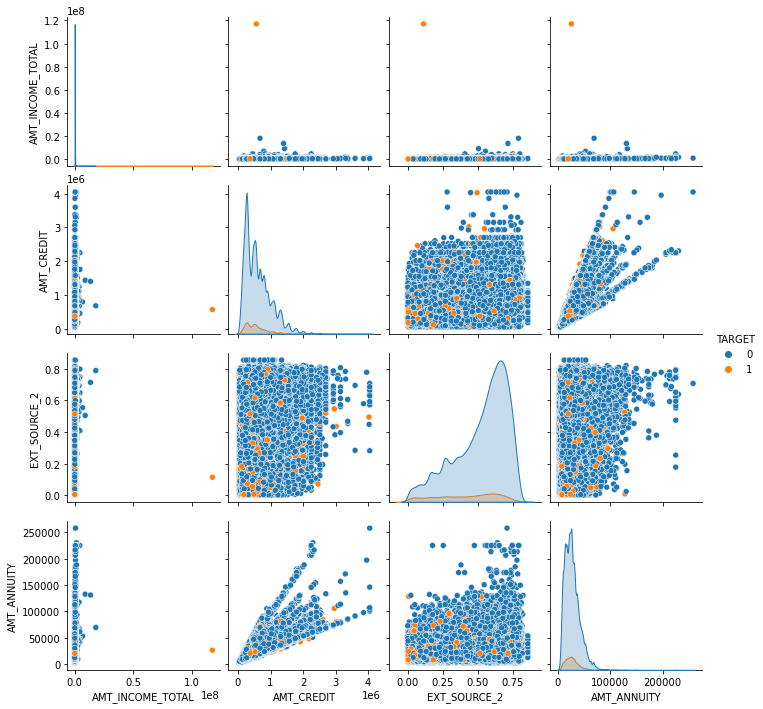

In [111]:
sns.pairplot(app_data[['AMT_INCOME_TOTAL','AMT_CREDIT','EXT_SOURCE_2','AMT_ANNUITY','TARGET']],hue='TARGET')
plt.show()

##### Inference:
- We can observe that higher amount of credits are majorly seen with non-defaulter category, which is a positive news for the bank.

#####  Categorical analysis:

In [112]:
# For analysis we need Income buckets so making a column 'Income Group'
bin_labels= ['Low3','Low2', 'Low1',"Low0","High0" ,"High1","High2", "High3"]
app_data['Income Group'] = pd.qcut(app_data['AMT_INCOME_TOTAL'],q=[0, .125, .25, .375 ,.5 , .625, .75, .875, 1],
                                  labels=bin_labels)

In [113]:
# Redefining 
df0=app_data[app_data.TARGET==0]
df1=app_data[app_data.TARGET==1]

In [114]:
# General fn for categorical bivariate analysis
def biv_an(i,j,data1=df1,data2=app_data):
    plt.figure(figsize=[25,15])
    plt.subplot(1,2,2)
    plt.title('Default rate wrt categories')
    sns.heatmap(pd.pivot_table(data=data1,columns=i,index=j,values='TARGET',aggfunc='count')/pd.pivot_table(data=data2,columns=i,index=j,values='TARGET',aggfunc='count'),annot=True,cmap='Blues')
    plt.subplot(1,2,1)
    plt.title('Count wrt categories')
    sns.heatmap(pd.pivot_table(data=data1,columns=i,index=j,values='TARGET',aggfunc='count'),annot=True,cmap='Greens')
    plt.show()

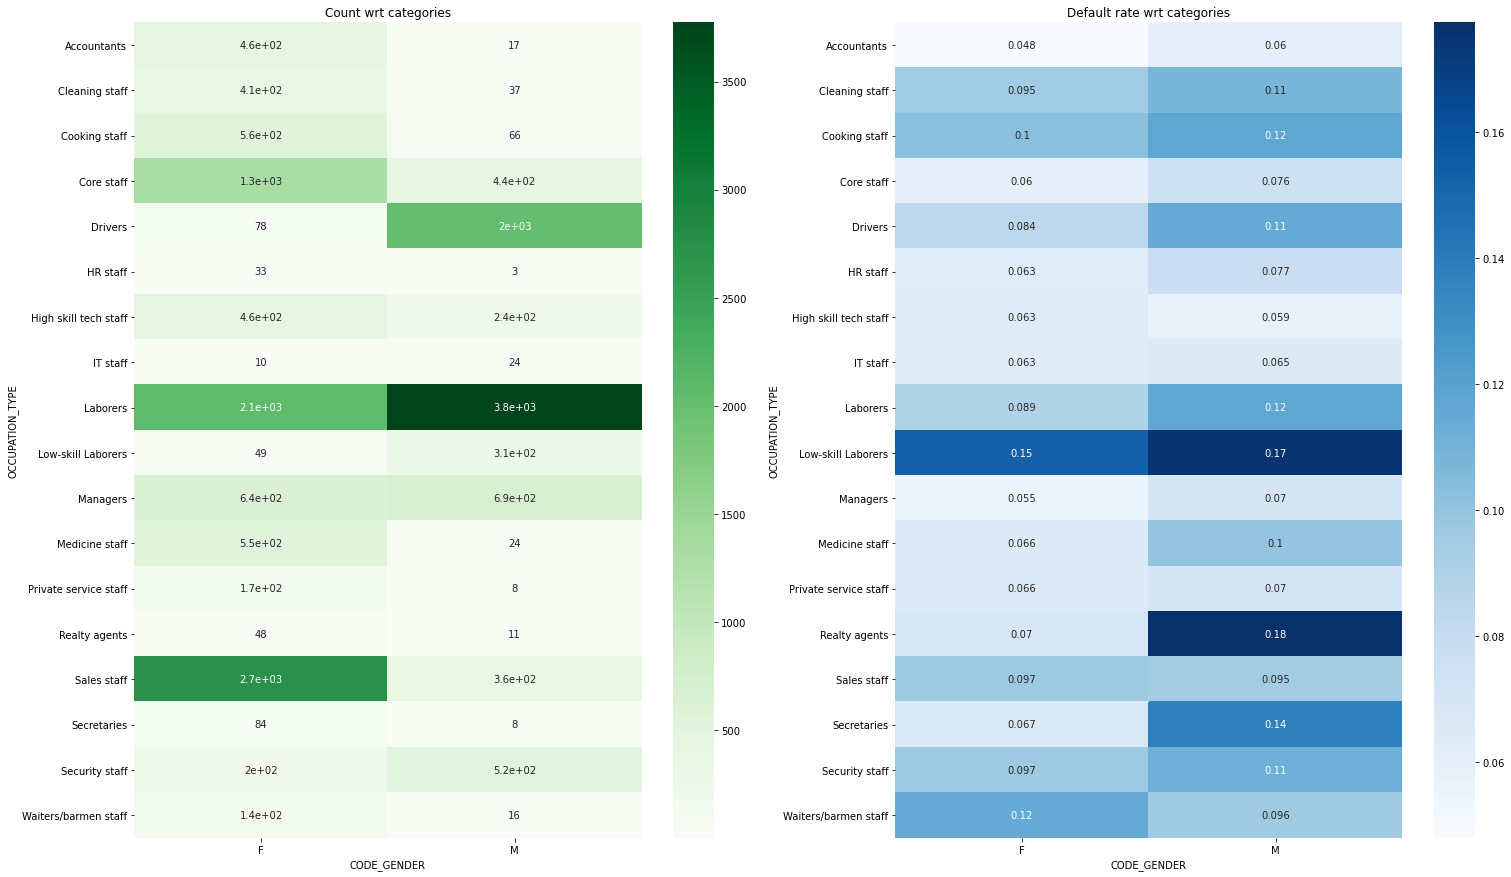

In [115]:
# ppt
# As there is a question why do men default more than women? Let's go deep into it. 
# Analysing 'CODE_GENDER','OCCUPATION_TYPE' wrt default
biv_an('CODE_GENDER','OCCUPATION_TYPE',data1=df1[df1.CODE_GENDER!='XNA'],data2=app_data[app_data.CODE_GENDER!='XNA'])

##### Inferences:
- As we can see here, there are more men in the job roles like "Laborers, Low-skill Laborers and Driver" categories compared to women. These categories make up the highest default making categories. Therefore, men have more default rates than women.
- Women are majorly at the roles of "Sales staff, core-staff and laborers" which have low default rates.
- Bank has provided a lot of loans to "Laborers and Low-skill Laborers" in male category, these categories have one of the highest default rates. The bank must be more vigilant and mindful about this observation.
- Highest default rate is in the "Realty agents" male category, i.e. around 18%.

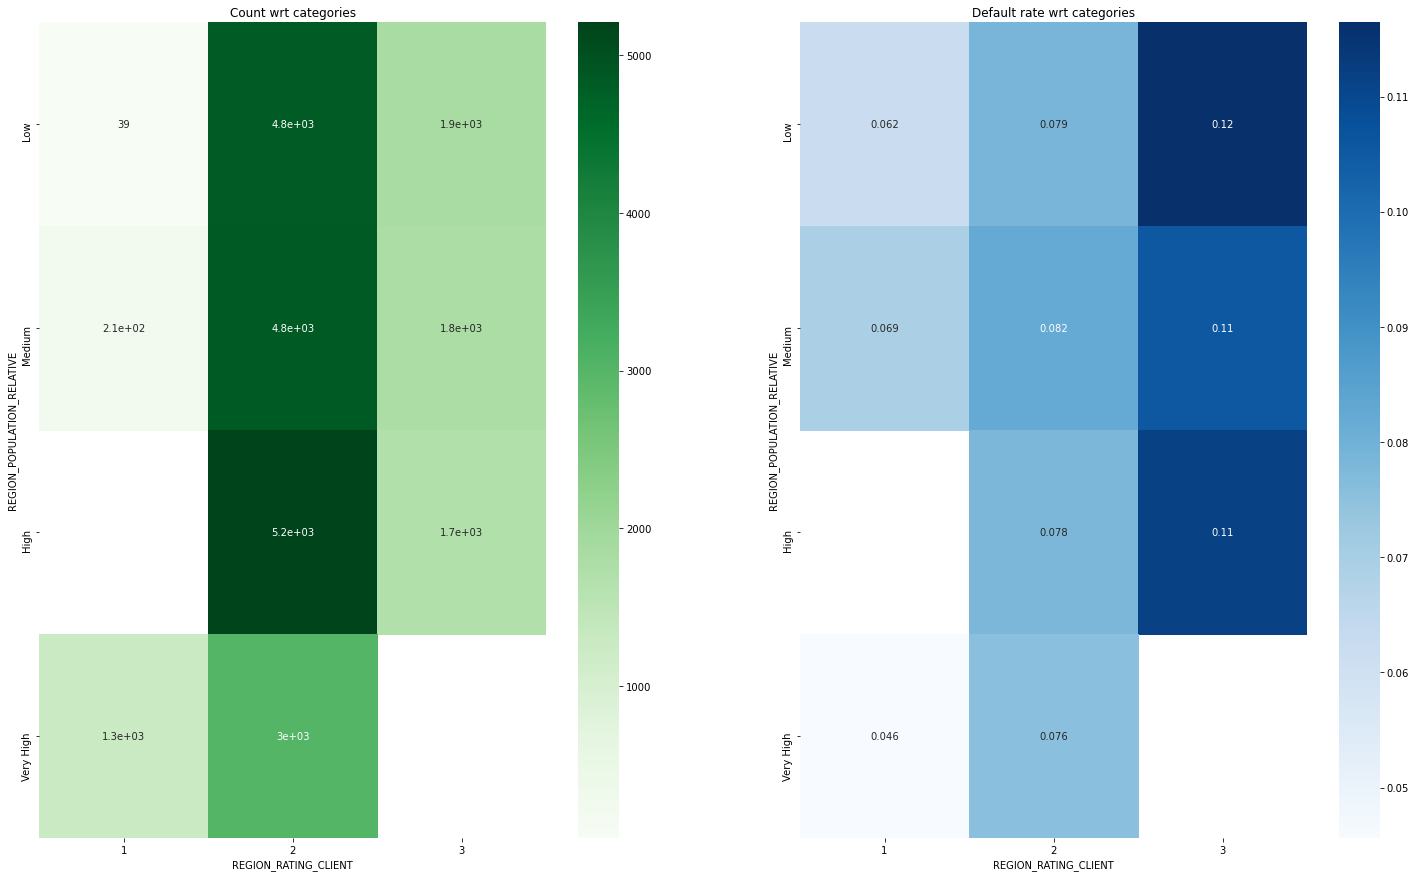

In [116]:
# Lets see relation between income and region rating on default rate 
# Analysing 'REGION_RATING_CLIENT','REGION_POPULATION_RELATIVE' wrt default
biv_an('REGION_RATING_CLIENT','REGION_POPULATION_RELATIVE')

##### Inferences:
- There is a clear pattern which indicates that, if a person belongs to "1st class" region and is having very high population, the default rate is very low, i.e 4.6% and if a person who belongs to "3rd class" region and having low population, have high default rate of 12%. Hence, population and default rate are inversely proportional.
- There is trend across population which indicates that, higher the population, lesser the default rate. This can also be interpreted as high population regions are majorly cities, where more educated people live. Whereas, low population places denote villages and less literacy, hence more default rate. 


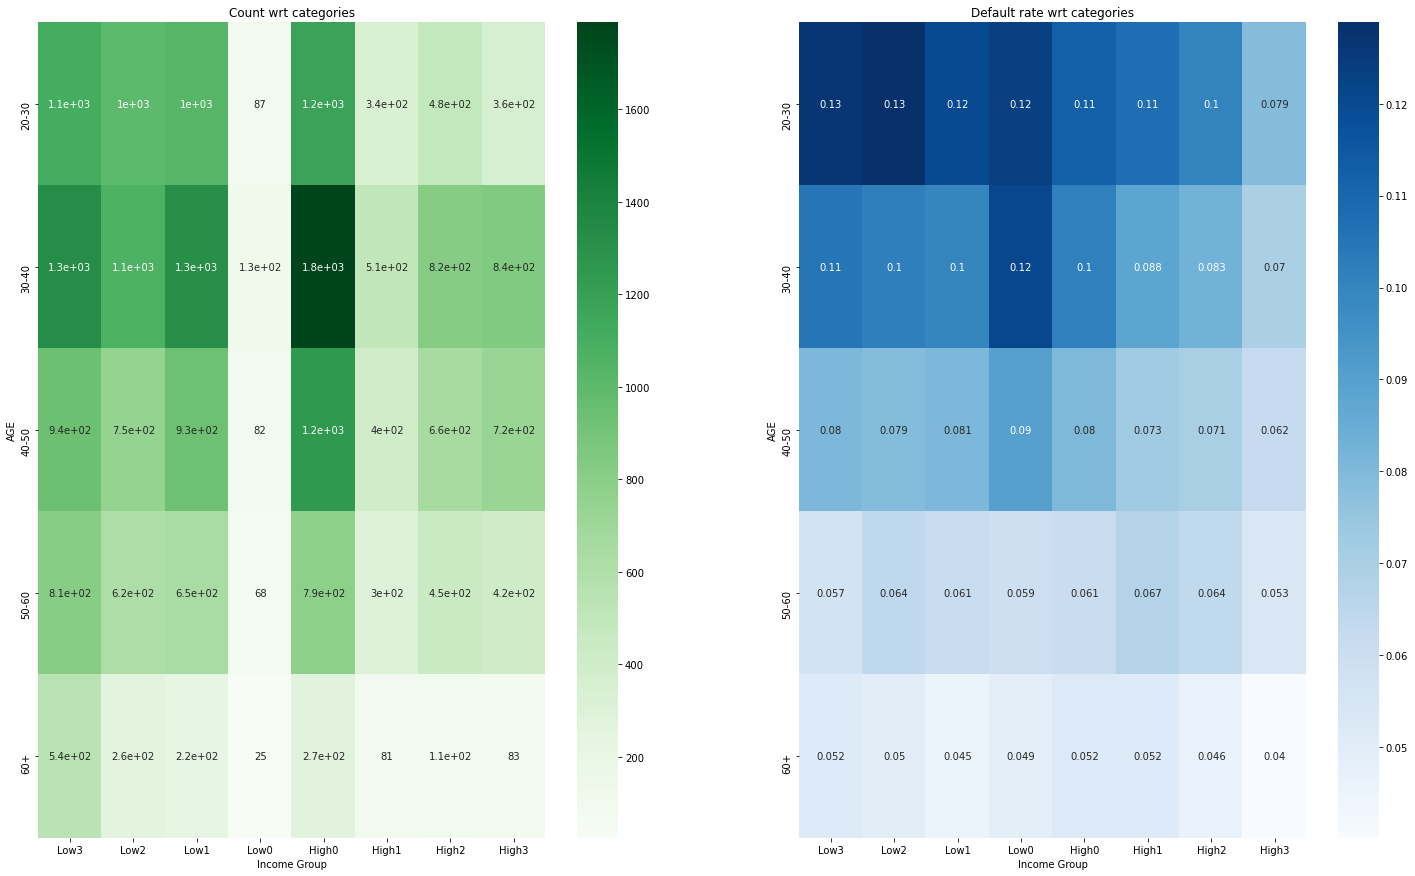

In [117]:
# Lets see relation between income group and age on default rate 
# Analysing 'INCOME GROUP','AGE' wrt default
biv_an('Income Group','AGE')

##### Inference:
- There is clear trend which indicates that, people of category "60+" with very high income is a good category to provide loans to, as it has only 4% default rate. People aged 20-30 and having low income, have high default rate of 13%. However, banks have to still exercise caution when giving loans to 60+ category, as this class of people are older in age and there is a risk of recovery of loan in case of death.

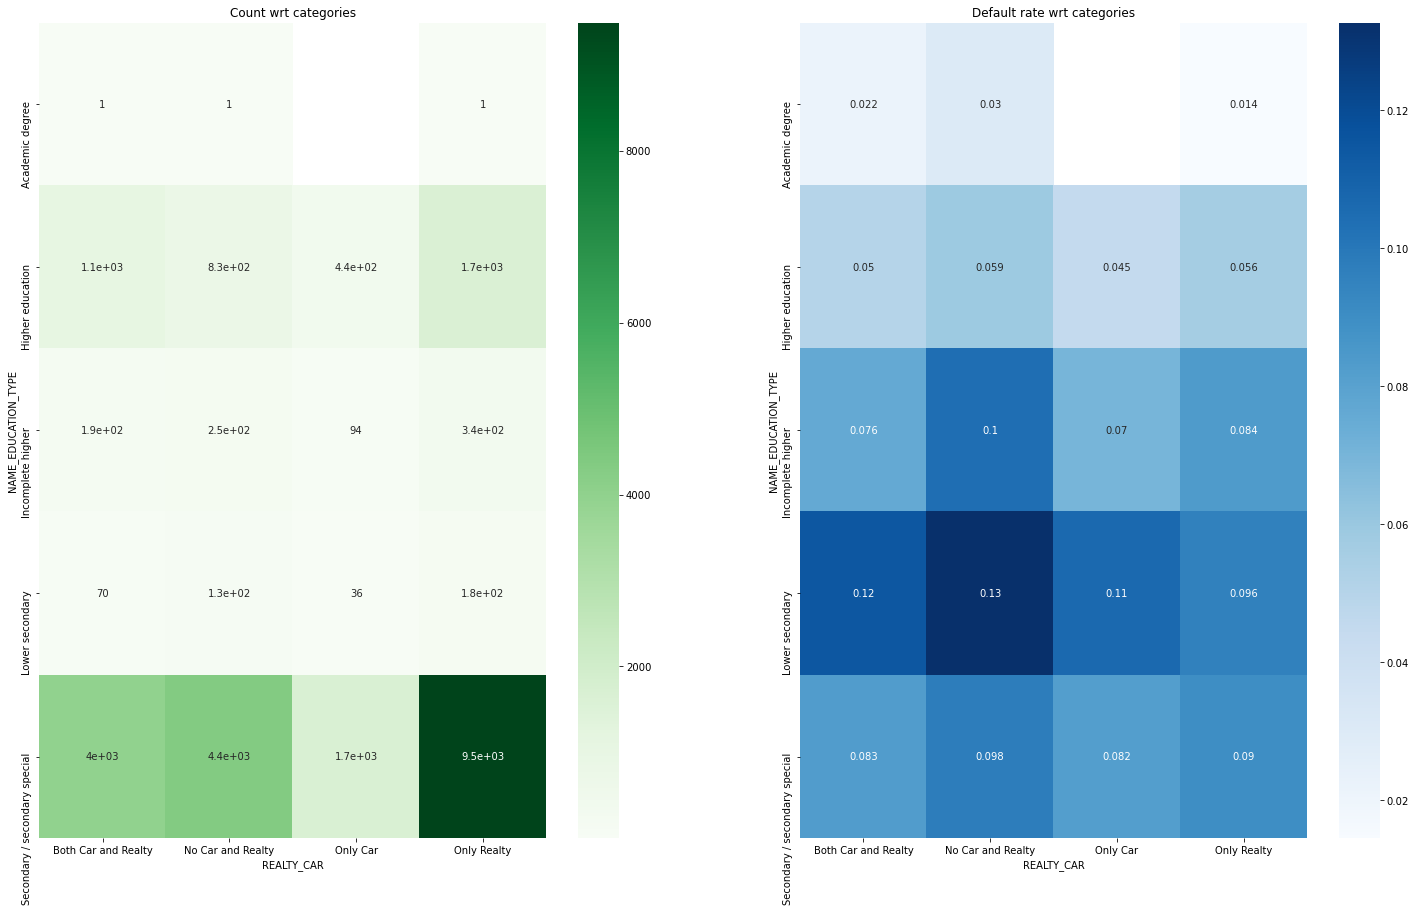

In [118]:
# analysing 'REALTY_CAR ,'NAME_EDUCATION_TYPE' column
biv_an('REALTY_CAR','NAME_EDUCATION_TYPE')

##### Inference:
- We can observe that people with category "Lower secondary" and "No Car and Realty" have very high default rate of 13% and people with "Higher education" and "Both car and realty" are pretty safe categories to grant loans to.


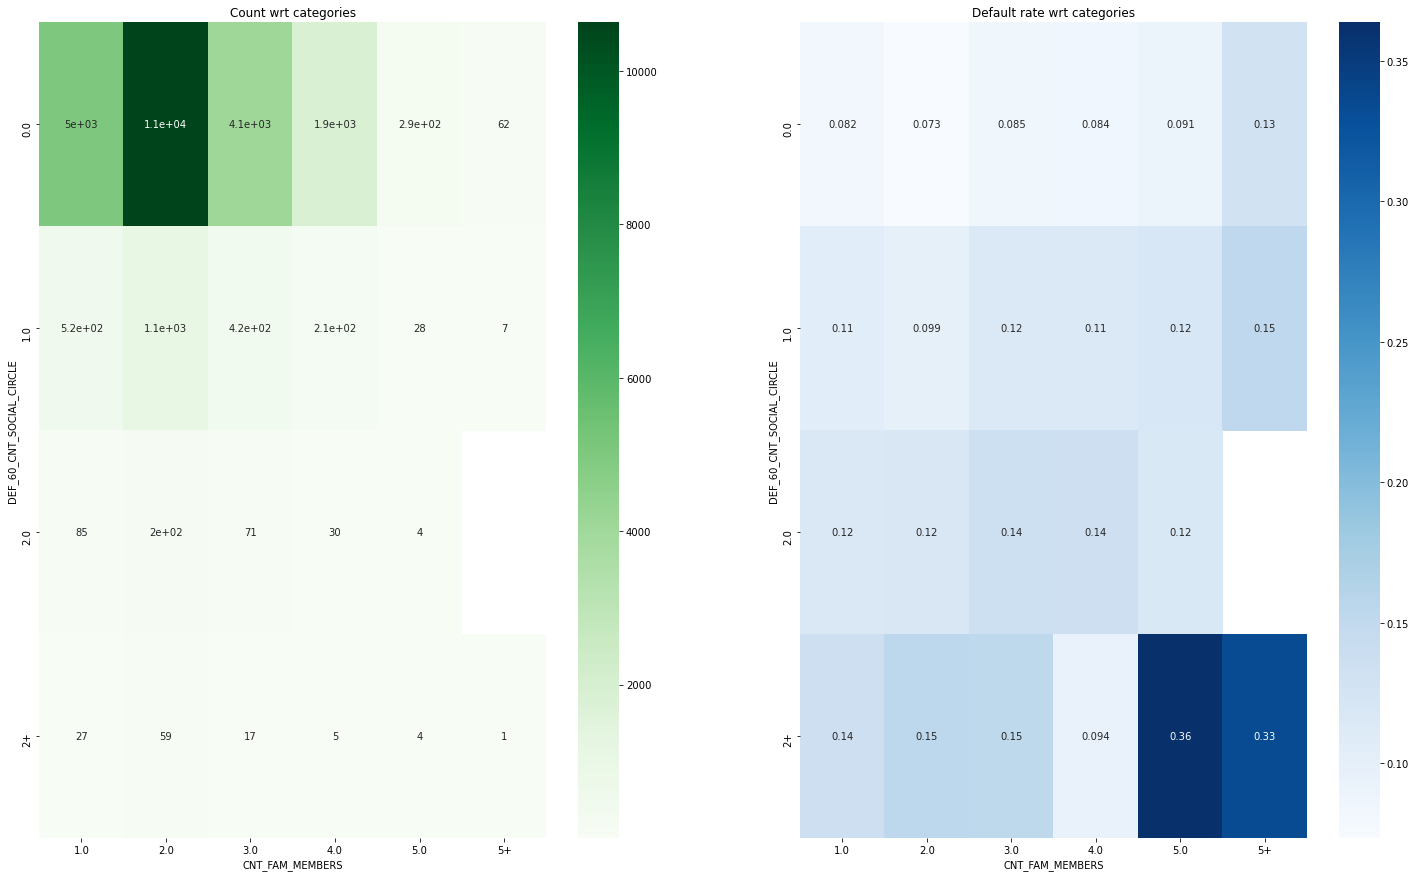

In [119]:
# Analysing 'CNT_FAM_MEMBERS,DEF_60_CNT_SOCIAL_CIRCLE column
biv_an('CNT_FAM_MEMBERS','DEF_60_CNT_SOCIAL_CIRCLE')

##### Inferences:
- There is a clear trend of people with "5 or 5+" number of family members and "2+" people defaulting in their circle have very high default rate of around 36% and people with "2" family members and no people defaulting in their circle have low default rate of 7.3%.
- As the number of members in the family increases and number of default in their social circle increases, the default rate also increases significantly.

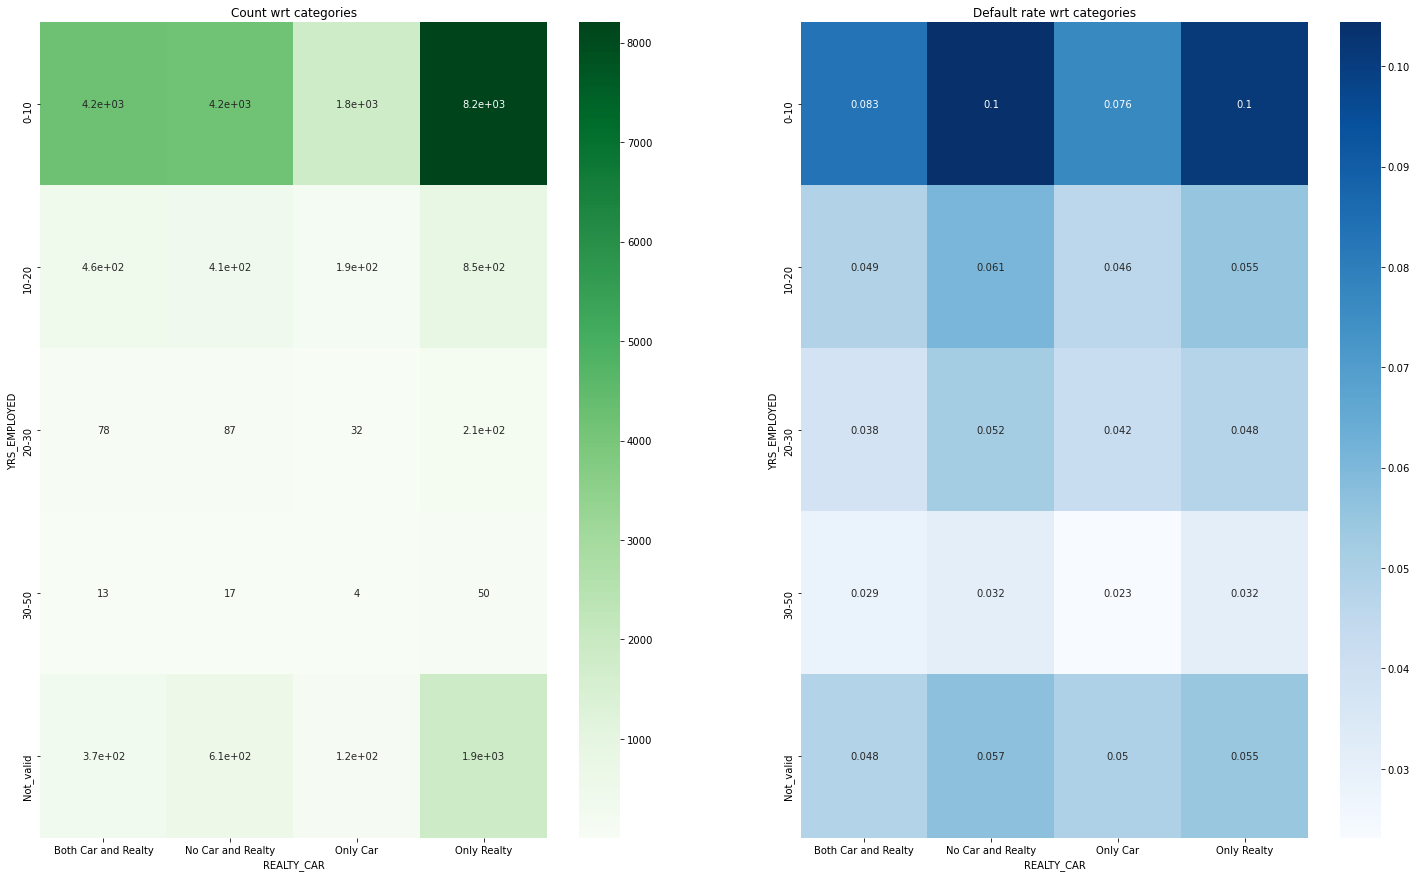

In [120]:
# Analysing REALTY_CAR,YRS_EMPLOYED column
biv_an('REALTY_CAR','YRS_EMPLOYED')

#####  Inferences:
- People with "No car and realty" or "Only realty" and experience of "0-10 years" have high default rate of 10%. 
- People with "Only car" with "30-50 yrs" experience are having the lowest default rate of 2.3%. 

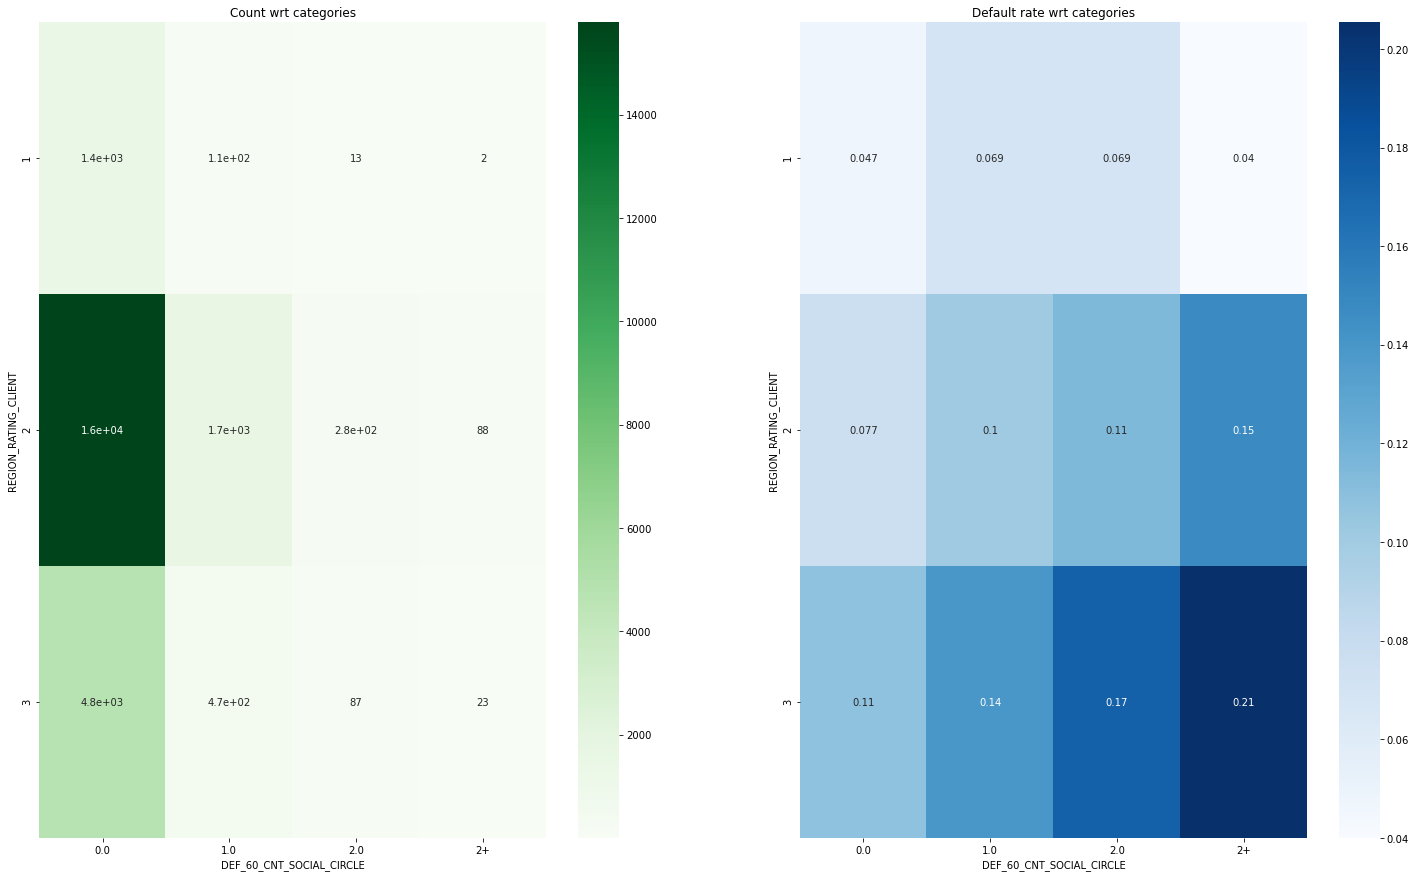

In [121]:
# Ananlysing DEF_60_CNT_SOCIAL_CIRCLE,REGION_RATING_CLIENT column
biv_an('DEF_60_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT')

##### Inference:
- There is a clear trend that as the "REGION_RATING_CLIENT" and "DEF_60_CNT_SOCIAL_CIRCLE" decreases, the default rate also decreases and vice versa.

##### Numerical and categorical

In [122]:
# General fn
def num_cat(i):
    plt.figure(figsize=[15,6])
    plt.subplot(1,2,1)
    plt.title('Median amount credited vs {}'.format(i))
    plt.xlabel(i)
    plt.ylabel('Median amount credited')
    (app_data.groupby(i)['AMT_CREDIT'].median()).plot(kind='bar',color='#DC143C')
    plt.subplot(1,2,2)
    plt.title('Default wrt Categories')
    plt.xlabel(i)
    plt.ylabel('Default %')
    (100*app_data[i][app_data['TARGET']==1].value_counts()/app_data[i].value_counts()).plot(kind='bar',color='#FFA07A')
    print('Total defaulted credit in various category :')
    print((app_data.groupby(i)['AMT_CREDIT'].median()).sort_values(ascending=False))

Total defaulted credit in various category :
CNT_CHILDREN
3     521280.0
2     521280.0
0     514777.5
4     509400.0
1     508495.5
4+    450000.0
Name: AMT_CREDIT, dtype: float64


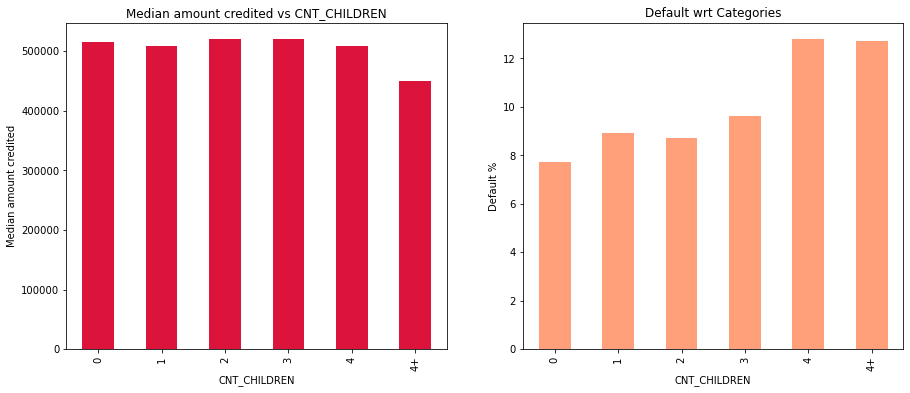

In [123]:
# 'CNT_CHILDREN' column analysis
num_cat('CNT_CHILDREN')

##### Inference:
- Bank is granting equally high amount of loans to each category, but as the default rate of people with more than 3 children is high, the bank should give lesser amount of loan to this category.

Total defaulted credit in various category :
NAME_INCOME_TYPE
Others                  604152.0
State servant           558000.0
Commercial associate    553806.0
Working                 497520.0
Pensioner               457515.0
Name: AMT_CREDIT, dtype: float64


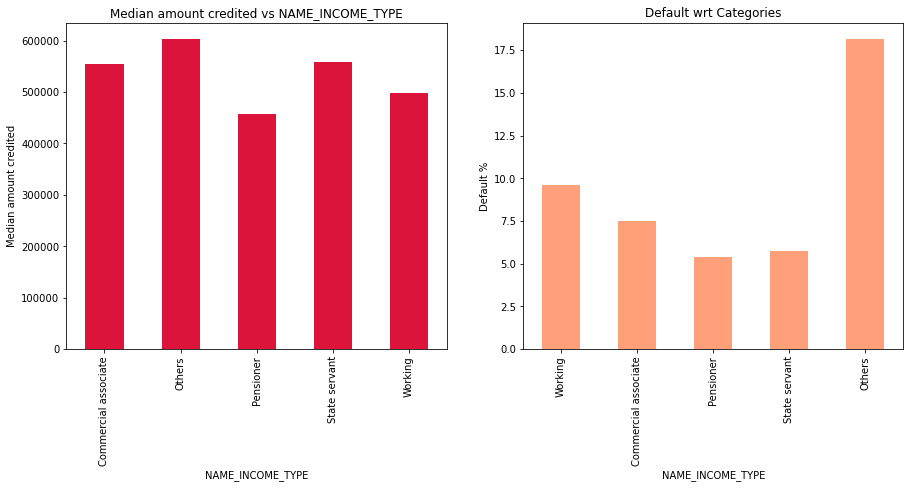

In [124]:
# 'NAME_INCOME_TYPE' column analysis
num_cat('NAME_INCOME_TYPE')

##### Inference:
- Bank is granting high amount of loans to "Other category" which includes "Maternity leave, Businessman, Student, Unemployed", which has the highest default rate of around 18%. Therefore, bank should shift to "Pensioner" or "State servant" category for granting higher amount of loans, as it has low default rate of 5%.

Total defaulted credit in various category :
DEF_60_CNT_SOCIAL_CIRCLE
0.0    518562.0
1.0    495000.0
2.0    485640.0
2+     472500.0
Name: AMT_CREDIT, dtype: float64


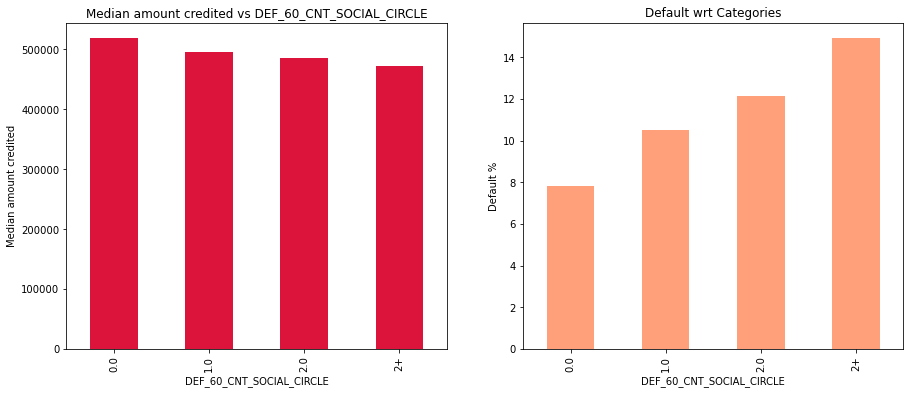

In [125]:
# 'REGION_RATING_CLIENT' column analysis
num_cat('DEF_60_CNT_SOCIAL_CIRCLE')

##### Inference:
- Bank is granting same amount of loan to each category, but it should not provide high amounts to the "2" and "2+" categories as they have high default rate. Bank should revisit their loan approval process. 

Total defaulted credit in various category :
LIVE_CITY_NOT_WORK_CITY
1    518562.0
0    512446.5
Name: AMT_CREDIT, dtype: float64


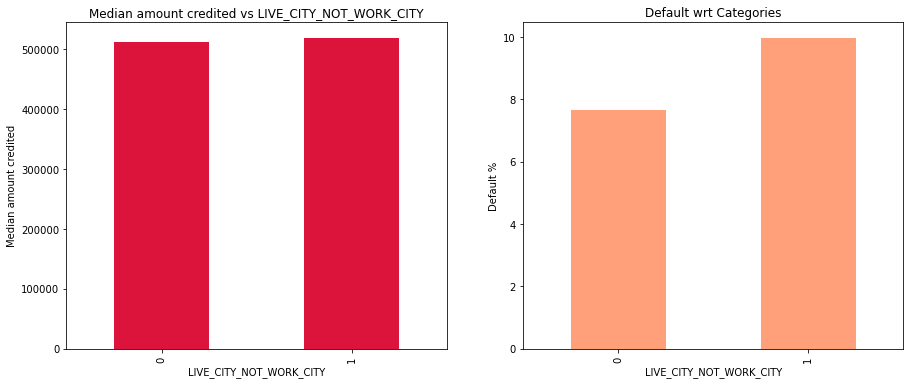

In [126]:
# Analysing LIVE_CITY_NOT_WORK_CITY column
num_cat('LIVE_CITY_NOT_WORK_CITY')

##### Inference:
- People having different living and working city are defaulting more, but bank is providing them high credit amounts. Therefore, the loan amounts granted must be reduced, to reduce the overall risk for the bank. 

### Previous data merging 

In [127]:
# Merging application datset with previous dataset 
final_data=pd.merge(app_data,prev_data,on='SK_ID_CURR',how='left')

In [128]:
final_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YRS_EMPLOYED,YRS_REGISTRATION,YRS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YRS_LAST_PHONE_CHANGE,TOTAL_ENQ_YR,REALTY_CAR,TOT_DOC_SUB,TOTAL_CONT_POINT,Income Group,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Medium,20-30,0-10,0-10,5-10,Laborers,1,2,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,3,1,Only Realty,1,4,High1,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.0,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,Low,40-50,0-10,0-10,0-5,Core staff,2,1,0,0,0,School,0.622246,NaN,1,0,1,0,2,0,No Car and Realty,1,4,High3,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,Low,40-50,0-10,0-10,0-5,Core staff,2,1,0,0,0,School,0.622246,NaN,1,0,1,0,2,0,No Car and Realty,1,4,High3,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.0,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0


In [129]:
final_data.shape

(1430153, 74)

In [130]:
len(final_data[final_data['SK_ID_PREV'].isna()])

16452

##### Inference:
- There are 16452 people in application dataset who does not have previous application data.

In [131]:
# Keeping only those rows whose previous data is available
final_data=final_data[~final_data['SK_ID_PREV'].isna()]

In [132]:
# Null analysis
100*final_data.isnull().sum()/final_data.shape[0]

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE_x            0.000000
CODE_GENDER                     0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT_x                    0.000000
AMT_ANNUITY_x                   0.006578
AMT_GOODS_PRICE_x               0.085449
NAME_TYPE_SUITE_x               0.249416
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
AGE                             0.000000
YRS_EMPLOYED                    2.580744
YRS_REGISTRATION                2.964630
YRS_ID_PUBLISH                  2.599984
OCCUPATION_TYPE                32.367523
CNT_FAM_MEMBERS                 0.000000
REGION_RATING_CLIENT            0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WO

In [133]:
# Removing all the columns with more than 39% missing values
for i in final_data.columns:
    if (100*final_data[i].isna().sum()/final_data.shape[0])>39:
        final_data.drop(i,axis=1,inplace =True)

In [134]:
final_data.shape

(1413701, 63)

In [135]:
# removing columns not required for our analysis
final_data.drop(['SK_ID_CURR','REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE','TOT_DOC_SUB',
       'TOTAL_CONT_POINT','SK_ID_PREV','WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START'],axis=1,inplace=True)

In [136]:
final_data.shape

(1413701, 51)

In [137]:
# Lets check for data imbalance for final_dataset
100*final_data.TARGET.value_counts(normalize=True)

0    91.344704
1     8.655296
Name: TARGET, dtype: float64

##### Data imbalance is still the same

In [138]:
final_data['TARGET']=pd.to_numeric(final_data['TARGET'])

In [139]:
# Univariate analysis
def uni_an(i):
    plt.figure(figsize=[20,6])
    plt.subplot(1,2,1)
    plt.title('Default rate vs {}'.format(i))
    plt.ylabel('Default %')
    (100*final_data.groupby(i)['TARGET'].sum()/final_data.groupby(i)['TARGET'].count()).plot(kind='bar')
    plt.subplot(1,2,2)
    plt.title('Credited Amount vs Category for there previous loan')
    plt.ylabel('Amount credited for the current loan')
    (final_data.groupby(i)['AMT_CREDIT_x'].median()).plot(kind='bar',color='#DC143C')
    print('Median amount given to category of {} column is: '.format(i))
    print((final_data.groupby(i)['AMT_CREDIT_x'].median()).sort_values(ascending=False))
    print('Default percentage for the categories of {} column is: '.format(i))
    print(((100*final_data.groupby(i)['TARGET'].sum()/final_data.groupby(i)['TARGET'].count())).sort_values(ascending=False))

Median amount given to category of NAME_CONTRACT_STATUS column is: 
NAME_CONTRACT_STATUS
Approved        517500.0
Canceled        501435.0
Unused offer    500211.0
Refused         490495.5
Name: AMT_CREDIT_x, dtype: float64
Default percentage for the categories of NAME_CONTRACT_STATUS column is: 
NAME_CONTRACT_STATUS
Refused         11.996414
Canceled         9.173569
Unused offer     8.251724
Approved         7.588655
Name: TARGET, dtype: float64


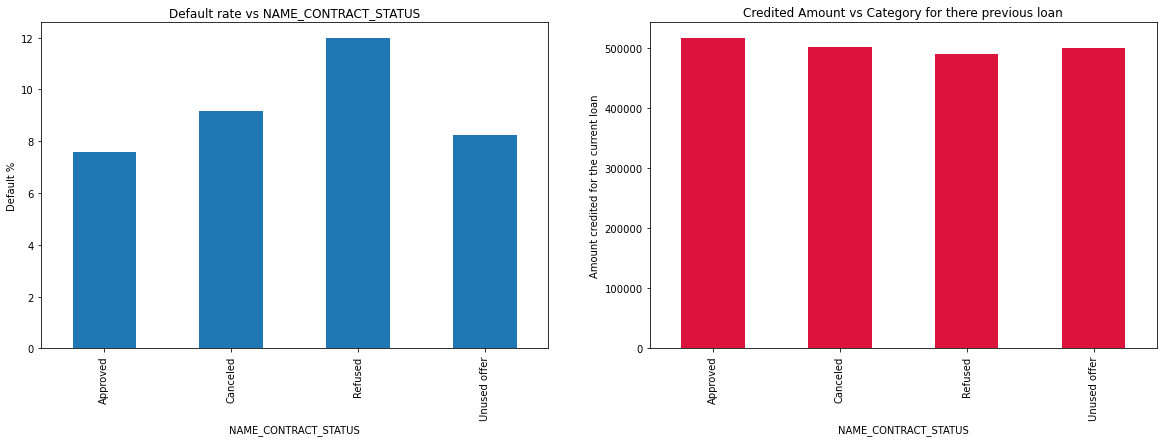

In [140]:
# Analysing 'NAME_CONTRACT_STATUS' column
uni_an('NAME_CONTRACT_STATUS')

##### Inference:
- Bank is granting high amounts (Rs. 490495.5) of loan to people whose loan contract was refused and cancelled previously. Hence, it should reduce the credit amount as these categories have high default rate of 12% and 9% respectively. 

Median amount given to category of NAME_PAYMENT_TYPE column is: 
NAME_PAYMENT_TYPE
Cash through the bank                        509602.5
XNA                                          501363.0
Cashless from the account of the employer    497520.0
Non-cash from your account                   490536.0
Name: AMT_CREDIT_x, dtype: float64
Default percentage for the categories of NAME_PAYMENT_TYPE column is: 
NAME_PAYMENT_TYPE
XNA                                          9.622342
Non-cash from your account                   8.211268
Cash through the bank                        8.086553
Cashless from the account of the employer    8.076514
Name: TARGET, dtype: float64


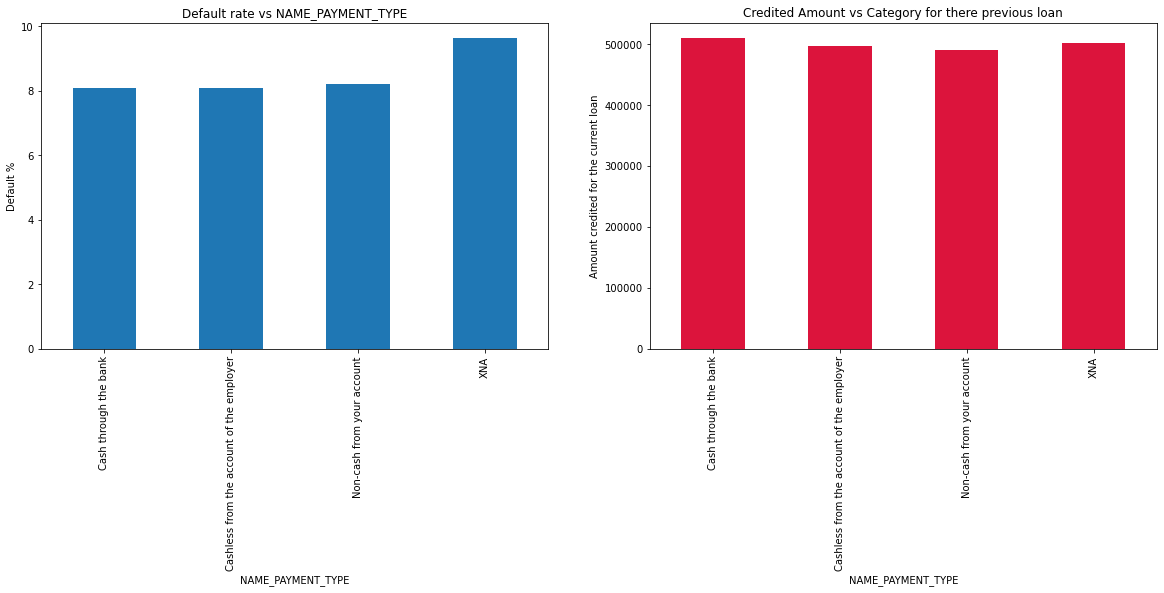

In [141]:
# Analysing 'NAME_PAYMENT_TYPE' column
uni_an('NAME_PAYMENT_TYPE')

##### Inference:
- People from category of XNA for NAME_PAYMENT_TYPE column for previous application are defaulting with a high default rate of 10%. Bank is providing them with high credit amount and this is may be deemed to be a risk.

Median amount given to category of NAME_PRODUCT_TYPE column is: 
NAME_PRODUCT_TYPE
x-sell     519633.0
XNA        508495.5
walk-in    490536.0
Name: AMT_CREDIT_x, dtype: float64
Default percentage for the categories of NAME_PRODUCT_TYPE column is: 
NAME_PRODUCT_TYPE
walk-in    12.469007
XNA         8.354841
x-sell      8.087827
Name: TARGET, dtype: float64


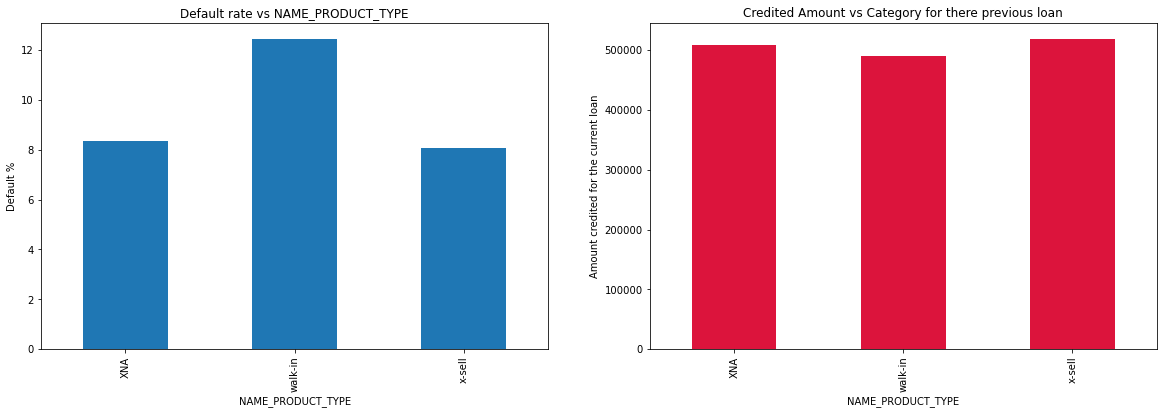

In [142]:
# Analysing 'NAME_PRODUCT_TYPE' column
uni_an('NAME_PRODUCT_TYPE')

##### Inference:
- "Walk-In" category is making highest default, i.e. 12% but bank is granting them almost as high amount of loans as other category. Therefore, this must be planned properly to avoid or reduce any potential risk.

Median amount given to category of NAME_SELLER_INDUSTRY column is: 
NAME_SELLER_INDUSTRY
Tourism                 540000.0
Clothing                526491.0
Industry                521280.0
Furniture               521280.0
Consumer electronics    518562.0
Construction            509400.0
XNA                     508495.5
Connectivity            490536.0
MLM partners            450000.0
Auto technology         450000.0
Jewelry                 373500.0
Name: AMT_CREDIT_x, dtype: float64
Default percentage for the categories of NAME_SELLER_INDUSTRY column is: 
NAME_SELLER_INDUSTRY
Auto technology         10.367647
XNA                      9.355507
Connectivity             9.207048
Jewelry                  8.875178
Consumer electronics     7.553387
Industry                 7.213135
Construction             6.574340
MLM partners             6.188925
Furniture                6.116489
Clothing                 5.724769
Tourism                  4.278075
Name: TARGET, dtype: float64


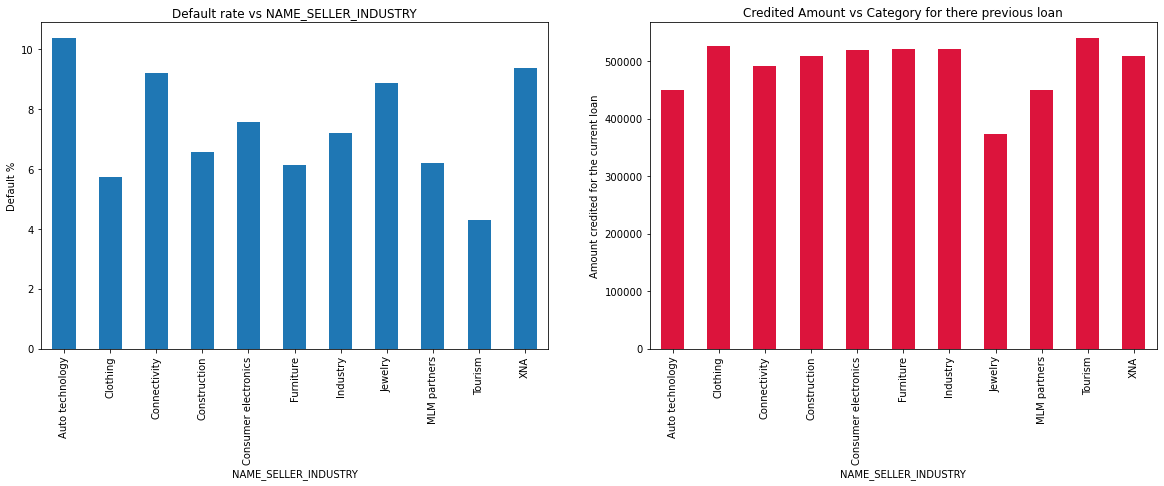

In [143]:
# ppt 
# Analysing 'NAME_SELLER_INDUSTRY' column
uni_an('NAME_SELLER_INDUSTRY')

##### Inference:
- Highest loan default is made by "Auto technology" category, i.e. 10% and lowest default is made by "Tourism" category, i.e. 4%. Bank has taken this into consideration and has distributed the loans keeping these factors in mind.

Median amount given to category of CODE_REJECT_REASON column is: 
CODE_REJECT_REASON
SYSTEM    645138.0
VERIF     563269.5
XAP       512064.0
CLIENT    500211.0
XNA       499500.0
SCO       497520.0
HC        495000.0
LIMIT     479974.5
SCOFR     411813.0
Name: AMT_CREDIT_x, dtype: float64
Default percentage for the categories of CODE_REJECT_REASON column is: 
CODE_REJECT_REASON
SCOFR     20.928736
LIMIT     12.559395
HC        11.734163
XNA       10.095934
SCO        9.998162
VERIF      9.256252
CLIENT     8.251724
XAP        7.947654
SYSTEM     6.250000
Name: TARGET, dtype: float64


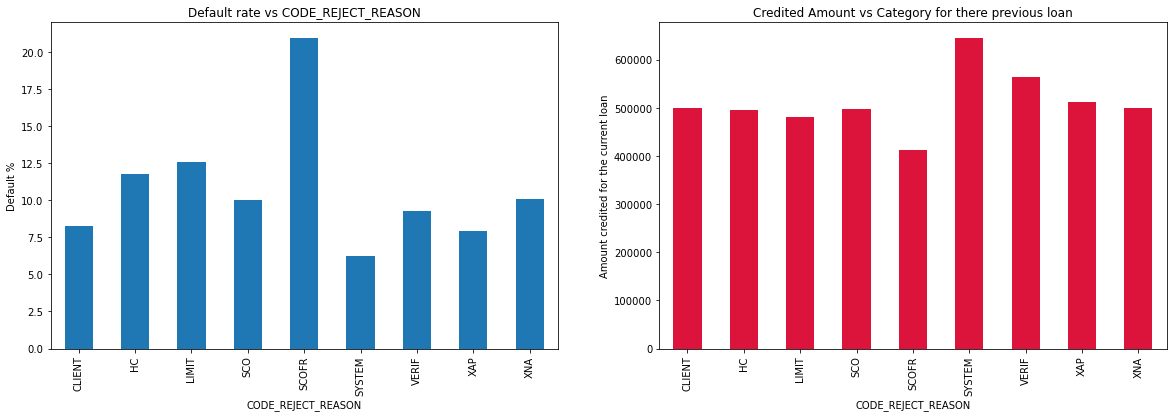

In [144]:
# Analysing 'CODE_REJECT_REASON' column
uni_an('CODE_REJECT_REASON')

##### Inference:
- Highest default is made by "SCOFR" category, i.e. is nearly 21% and lowest default is made by "SYSTEM" category, i.e. 6%. Bank has distributed their line of credit keeping this factor in mind.

Median amount given to category of NAME_CONTRACT_TYPE_y column is: 
NAME_CONTRACT_TYPE_y
Consumer loans     509400.0
Cash loans         508495.5
Revolving loans    500427.0
XNA                436500.0
Name: AMT_CREDIT_x, dtype: float64
Default percentage for the categories of NAME_CONTRACT_TYPE_y column is: 
NAME_CONTRACT_TYPE_y
XNA                20.127796
Revolving loans    10.468618
Cash loans          9.125763
Consumer loans      7.709962
Name: TARGET, dtype: float64


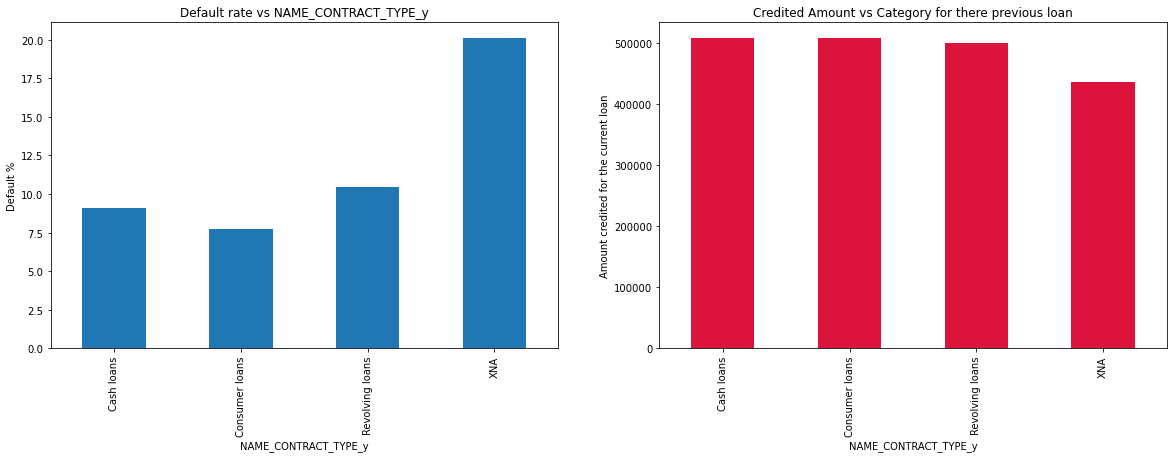

In [145]:
# Analysing 'NAME_CONTRACT_TYPE_y' column
uni_an('NAME_CONTRACT_TYPE_y')

##### Inference:
- We can observe that "XNA" category is having high default rate of 20%, which is significantly higher than other categories but bank has not reduced their line of credit significantly. Therefore, this must be re-evaluated to avoid or reduce any potential risk.